# Исследование продаж видеоигр для магазина "Стримчик"
Интренет-магазин "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В этом проекте мы выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 года. И мы планируем кампанию на 2017. Аббревиатура ESRB (Entertaiment Software Rating Board) - это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию ("Для взрослых", "Для летей младшего возраста" или "Для подростков").


<b>Краткое содержание проекта:</b>
- Изучение общей информации о файле с данными.
- Изучение столбцов и поиск потенциальных ошибок.
- Работа над ошибками файла. Заполнение пропусков и исправление ошибок.
- Изменение типов данных.
- Проверка дубликатов.
- Анализ данных.
- Выводы и поиск ответов на основные вопросы, поставленных в проекте.
- Портрет пользователей по регионам.
- Проверка гипотез.
- Общий вывод.
- Чек-лист проекта.

<b>Автор проекта:</b>
- Виктория Кускова, 
- студентка Яндекс.Практикума, кагорты DS17.

## Шаг: Открытие файлов с данными и изучение общей информации
Откроем файл и изучим его содержимое. Определим пропуски и ошибки, проверим строки на дубликаты.

In [1]:
#импорты библиотек и ключевые константы для проекта
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import re

In [2]:
#импорт файла с данными
games = pd.read_csv('/datasets/games.csv')

In [3]:
#общая информация
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, всего у нас 16715 строк. 

Также обнаружены пропуски в столбцах:
- Name - 2 пропуска,
- Genre - 2 пропуска,
- Year_of_Release - 269 записей,
- Critic_Score - 8578 записей,
- User_Score - 6701 записей,
- Rating - 6766 записей.

Изучим внимательнее эти пропуски, а также другие потенциальные ошибки по столбцам. Но чтобы с самого начала избежать ошибок с названиям столбцов (буквы разного регистра), переименуем столбцы уже на этом этапе.

In [4]:
#games.columns = [x.lower() for x in games.columns]
games.columns = games.columns.str.lower()

In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы переименовались, отлично! Идем дальше.

### Столбцы 'name', 'platform', 'genre'.

Столбцы 'name', 'platform', 'genre' изучим вместе, это текстовые значения, которые скорее всего в связке однозначно определяют игру для изучения. В двух столбцах из трех мы обнаружили пропуски, начнем их изучать.

In [6]:
# изучение пропусков в name
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Интересно, 2 строки с пропусками по столбцам 'name' и 'genre' совпали. Видно, что это данные за 1993 год.

Возможно пропуски появились так:
- Это данные за 1993 год, тогда часто учет велся на бумаге, возможно эти данные просто не перенесли из книг учета магазина в электронный вид.
- Или учет был электронный, но сосвем в другой IT системе, а при многошаговом переносе данных затерялись подробности. 

Продажи не такие большие, платформа уже устаревшая. Эти строки можно удалить из анализа.

Продолжим проверку.

In [7]:
len(games['name'].unique())

11560

In [8]:
games['name'].nunique()

11559

Одназначно уникальных значений с названиями игр меньше, чем строк. Либо у нас 5 тыс дубликатов, либо одна и та же игра могда выходить на разных платформах, к примеру. Проверим.

In [9]:
len(games.groupby(['name','platform']))

16710

Бинго! Уникальных комбинаций по имени и платформе почти столько же, сколько и строк. Посмотрим на оставшиеся 5 комбинаций (10 строк), которые вероятно повторяются, возможно они выходили в разные года. А возможно это действително дубликаты.

In [10]:
games[games.duplicated(subset=['name','platform'], keep=False)].sort_values(['name','platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Итак, 2 строки с NaN - это наши пропуски, которые мы разобрали выше. Их мы удалим.

По 4 строкам различаются года выпуска и продажи. Их не будем трогать и удалять, вероятно были перевыпуски игр.

По 2 строкам (Madden NFL 13 и PS3) сопадает все, кроме продаж, одна строка почти вся с нулевыми продажами. Она выглядит лишней, возможно это данные по прототипу, которые случайно попали к нам. Удалим ее, продажи по ней можно приплюсовать к основной строке. 

По 2 строкам Sonic the Hedgehog для PS3 в одной из строк не хватет года. Продажи разные, но в обеих есть строки с большими продажами в разных регионах. Посмотрим внимательнее на другие строки для этой игры.

In [11]:
games[games['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Кажется это перевыпуск игры 1991 года. Также судя по продажам для X360 игра популярна в Европе, поэтому скорее всего это тоже данные по 2006 году для Европы. Заменим для это строки с NaN год на 2006, а потом удалим дубликаты и заменим продажи на сумму таких строк. Этот медод подойдет и для комбинации Madden NFL 13 и PS3 (где тоже сложим продажи и оставим 1 строку).

С дубликатами разобрались, посмотрим еще на распределение платформ и жанров.

In [12]:
len(games['platform'].unique())

31

In [13]:
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Дубликатов и ошибок не видно, там где есть буквы нижнего регистра - это особенность названия.

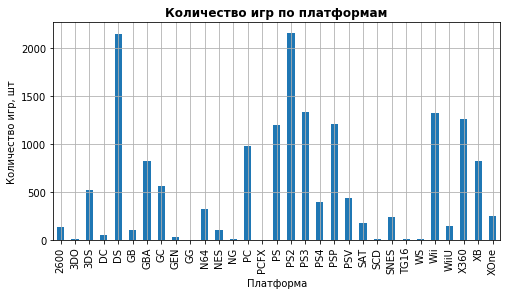

In [14]:
games.query('name.notnull()').pivot_table(index='platform', values='name', aggfunc='count').plot(
    grid=True, figsize=(8,4), kind='bar', legend=False
)
plt.title("Количество игр по платформам", fontweight='bold', size='large')
plt.ylabel("Количество игр, шт")
plt.xlabel("Платформа")
plt.show()

Итак, у нас есть 31 платформа. У нас однозназно есть лидеры, а также платформы, которые представлены средне и полохо. Но выделяющихся сильно значений нет. Посмотрим на жанры.

In [15]:
len(games['genre'].unique())

13

In [16]:
games['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Тут также не видно ошибок в названиях. А nan - как мы помним, это те 2 строки с пустым именем.

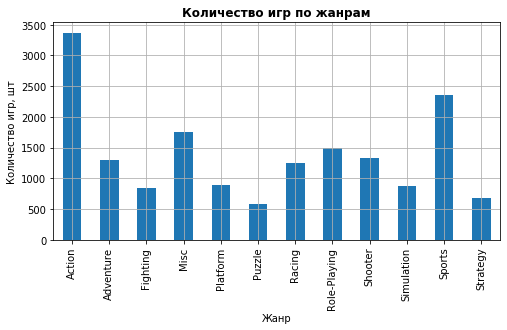

In [17]:
games.query('name.notnull()').pivot_table(index='genre', values='name', aggfunc='count').plot(
    grid=True, figsize=(8,4), kind='bar', legend=False
)
plt.title("Количество игр по жанрам", fontweight='bold', size='large')
plt.ylabel("Количество игр, шт")
plt.xlabel("Жанр")
plt.show()

В данном случае все выглядит еще более похоже между собой, а лидером по количеству выпускаемых игр явно является жанр "Action". Всего жанров у нас 12 (nan не считаем). Перейдем к следующим столбцам.

### Столбец 'year_of_release'.

Мы уже знаем, что в этом столбце есть пропуски - 269 значений. Одно мы уже встрели выше при анализе дубликатов, изучим остальные. Но сначала посмотрим на общее распределение по годам.

In [18]:
games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Итак данные у нас наиная с 1980 года по 2016.

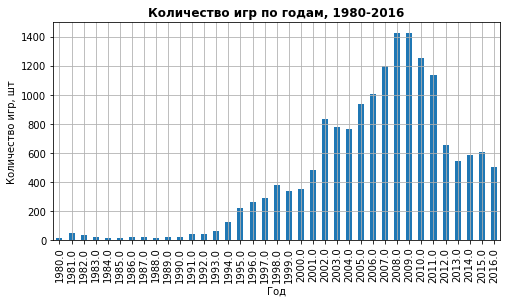

In [19]:
games.query('name.notnull()').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    grid=True, figsize=(8,4), kind='bar', legend=False
)
plt.title("Количество игр по годам, 1980-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, шт")
plt.xlabel("Год")
plt.show()

Наглядно видно, что с форматом года нам нужно еще поработать!

Но также видно, больше всего игр было выпущено в 2008 и 2009 годах (более 1400 игр за год). А постепенный рост количества выпускаемых игр начался даже в 1993-1994 годах.
После 2009 года начался спад количества выпускаемых игр и в 2012 их вышло всего чуть больше 550. Но с 2013 опять начался постепенный рост.

Также мы знаем, что по 2016 году данные не полные. Вероятно 2016 ожидался больше 2015 по представлености игр, но возможно данные собирались раньше и сюда не попали часть игр. Будем это помнить и вернемся к анализу количества выпускаемых игр позже после заполнения пропусков. А пока разберемся с самими пропусками.

In [20]:
games.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


По части игр можно год есть прямо в названии игры, попробуем заполнить пропуски, взяв информацию оттуда.

Также как помним из прошлого параграфа, год можно восстановить, если посмотреть на даты выхода игры на других платформах. Также можно в спорных ситуациях опираться на информацию по годам активности других игр на этой платорме. На следующем шаге попробуем заполнить пропуски, используя именно такие методы.

### Столбцы 'na_sales',  'eu_sales', 'jp_sales', 'other_sales'.

В данных столбцах нет пропусков, посмотрим есть ли необычные значения, которые следуют посмотреть более детально.

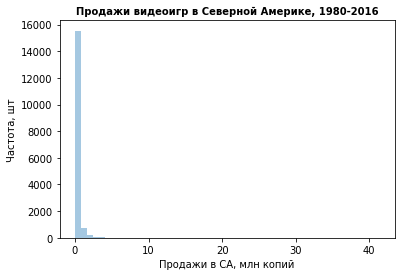

In [21]:
plt.title("Продажи видеоигр в Северной Америке, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games['na_sales'], kde=False, rug=False, axlabel="Продажи в СА, млн копий")
plt.show()

Видим, что есть длинный, но почти незаметный хвост. Это означает, что возможно большинство игр в Северной Америке продаются не так хорошо (пик около 0). Но есть игры с очень хорошими продажами, но это скорее исключения.

Посмотрим на то, что происходит ближе к 0.

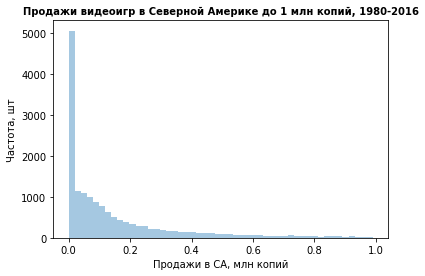

In [22]:
plt.title("Продажи видеоигр в Северной Америке до 1 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('na_sales < 1')['na_sales'], 
             kde=False, rug=False, axlabel="Продажи в СА, млн копий")
plt.show()

При анализе среза до 1 млн копий пик у нуля сохраняется, но уже не такой большой, распределение все больше похоже на Пуассона. Посмотрим ближе.

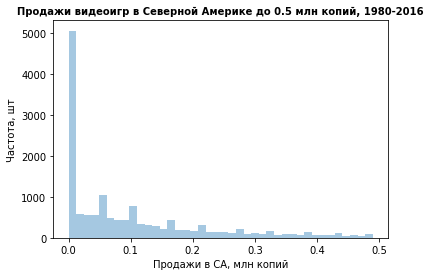

In [23]:
plt.title("Продажи видеоигр в Северной Америке до 0.5 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('na_sales < 0.5')['na_sales'], 
             kde=False, rug=False, axlabel="Продажи в СА, млн копий")
plt.show()

Видим, что пик у 0 уже не сильно уменьшился. Скорее всего есть игры, где продажи в одном регионе = 0, это могут быть игры, которые являются локальными для другого региона. Посмотрим сколько таких игр и какой это процент для каждого региона. А также после добавления общих продаж посмотрим на распредление общих продаж. 

In [24]:
len(games.query('na_sales == 0')) / len(games)

0.2696978761591385

Для Северной Америки - это около 27%. 

Посчитаем это и для других регионов.

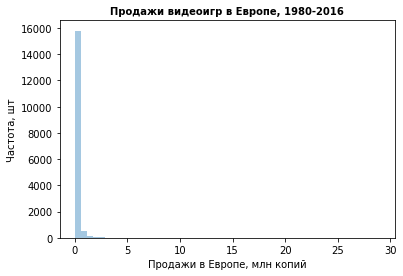

In [25]:
plt.title("Продажи видеоигр в Европе, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games['eu_sales'], kde=False, rug=False, axlabel="Продажи в Европе, млн копий")
plt.show()

Аналогичная ситуация с Европой: длинным хвостом и пиком около 0.

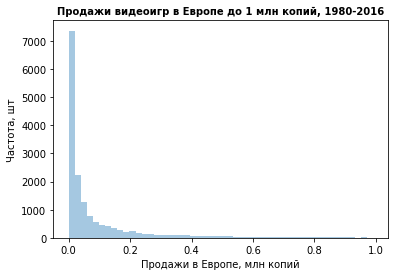

In [26]:
plt.title("Продажи видеоигр в Европе до 1 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('eu_sales < 1')['eu_sales'], 
             kde=False, rug=False, axlabel="Продажи в Европе, млн копий")
plt.show()

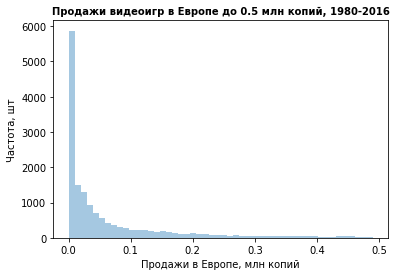

In [27]:
plt.title("Продажи видеоигр в Европе до 0.5 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('eu_sales < 0.5')['eu_sales'], 
             kde=False, rug=False, axlabel="Продажи в Европе, млн копий")
plt.show()

Пик около 0 при приближении в Европе ведет себяпохожим образом на продажи в Северной Америке. Посмотрим на долю игр с нулевыми продажами.

In [28]:
len(games.query('eu_sales == 0')) / len(games)

0.3511815734370326

Уже 35%, чуть больше игр не продается в Европе совсем. Перейдем к Японии.

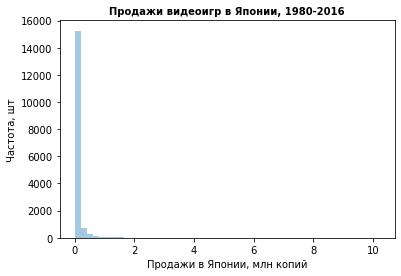

In [29]:
plt.title("Продажи видеоигр в Японии, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games['jp_sales'], kde=False, rug=False, axlabel="Продажи в Японии, млн копий")
plt.show()

В Японии также: большое количество игр с продажами около 0, и большой хвост.

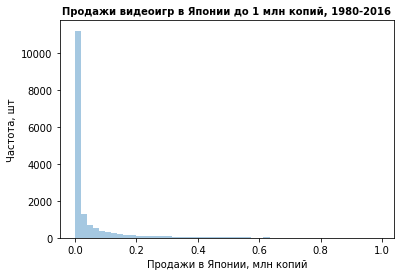

In [30]:
plt.title("Продажи видеоигр в Японии до 1 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('jp_sales < 1')['jp_sales'], 
             kde=False, rug=False, axlabel="Продажи в Японии, млн копий")
plt.show()

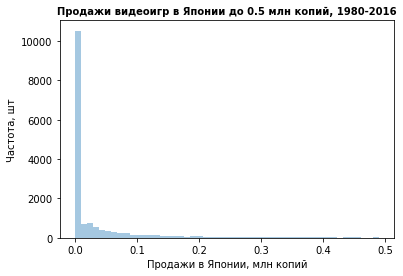

In [31]:
plt.title("Продажи видеоигр в Японии до 0.5 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('jp_sales < 0.5')['jp_sales'], 
             kde=False, rug=False, axlabel="Продажи в Японии, млн копий")
plt.show()

In [32]:
len(games.query('jp_sales == 0')) / len(games)

0.6290158540233324

В Японии почти 62% игр имеют нулевые продажи. Скорее всего Япония самый локальный рынок. Давайте еще псомотрим на то, сколько процентов игр имеют нулевые продажи во всех этих 3 регионах.

In [33]:
len(games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0')) / len(games)

0.00017947950942267426

Почти 0, значит выборка наших игр - именно выборка по ключевым играм для этих 3 регионов. А суммарных нулевых продаж по всем 3 регионам в нашей выборке почти нет.

Посмотрим на оставшиеся продажи. 

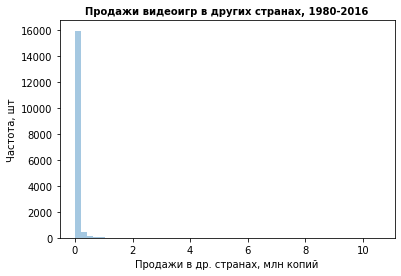

In [34]:
plt.title("Продажи видеоигр в других странах, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games['other_sales'], kde=False, rug=False, axlabel="Продажи в др. странах, млн копий")
plt.show()

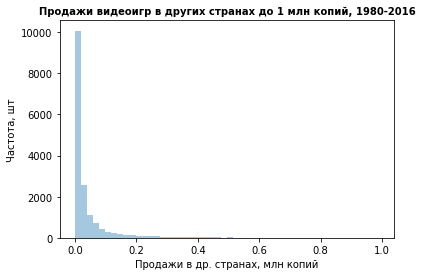

In [35]:
plt.title("Продажи видеоигр в других странах до 1 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('other_sales < 1')['other_sales'], 
             kde=False, rug=False, axlabel="Продажи в др. странах, млн копий")
plt.show()

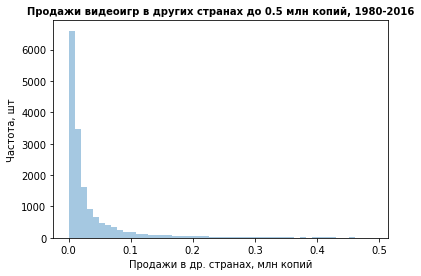

In [36]:
plt.title("Продажи видеоигр в других странах до 0.5 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('other_sales < 0.5')['other_sales'], 
             kde=False, rug=False, axlabel="Продажи в др. странах, млн копий")
plt.show()

In [37]:
len(games.query('other_sales == 0')) / len(games)

0.3949147472330242

В других оставшихся регионах есть продажи чаще, чем в Японии. Интересная особенность, Япония д=имеет действительно уникальное поведение.

In [38]:
len(games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')) / len(games)

0.00011965300628178283

In [39]:
len(games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0'))

2

Всего 2 игры, где продажи по всем регионам нулевые.

Как мы видим продажи в разных регионах ввыглядят одинаково: большое количество игр с продажами около 0, но есть редкие игры, которые продаются хорошо и создают длинный хвост. Больше всего нулевых продаж у Японии, почти 62% (у СА - 27%, у Европы - 35%, у др. стран - 39%). 

Случаев, когда продажи в Европе, Северной Америке и Японии равны нулю - почти нет. Это значит, что выборка наших игр - именно выборка по ключевым играм для этих 3 регионов.

Это предвариательный анализ, из которого мы пока можем сказать: что распределние продаж действительно очень похоже между регионами, это понижает вероятность того, что есть какие-то выборочные ошибки в данных, которые создают эти пики около 0 и длинные хвосты. Так как выглядит уже не так случайно.

На следующем шаге посмотрим на данные в этих столбцах более детально.

### Столбцы 'critic_score', 'user_score', 'rating'.

В столбце 'critic_score' значения имеют формат float и есть много пропусков: 8578 и 6701 пропущенных значений. Посмотрим сначала как распределены не нулевые значения.

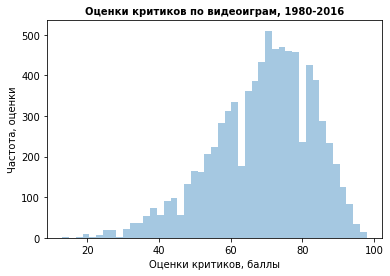

In [40]:
plt.title("Оценки критиков по видеоиграм, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, оценки")
sns.distplot(a=games.query('critic_score.notnull()')['critic_score'], 
             kde=False, rug=False, axlabel="Оценки критиков, баллы")
plt.show()

Распределение похоже на нормальное, с пиком около 70 баллов. Выглядит правдоподобно.

В столбце 'user_score' значения имеют формат object, хотя по описанию там должны быть числовые значения (оценка до 10). Посмотрим почему.

In [41]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Значение "tbd" выделяется, именно оно портит нам формат и делает столбец с форматом object, а не числовым. 

TBD - аббревиатура для "to be determinated", это означает, что оценки просто пока не было. Возможно просто не нашлось пользователей, которые оценили данные игра на ресурсе, откда тянулась информация. Так как период анализа у нас большой, то данные явно могли тянуться из разных источников, и вместо nan в некоторых могли подтянуться tbd.

Такие значения правильно заменить на nan, а не 0. Так как у таких игр именно нет оценки, а не оценка 0.

Посмотрим на распределение оценок без nan и tbd.

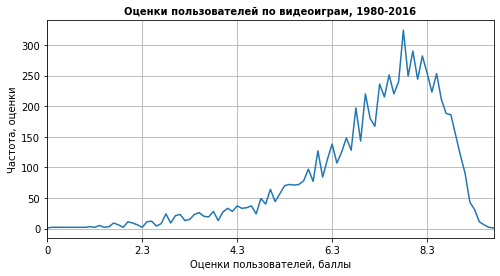

In [42]:
games.query('user_score.notnull() and user_score != "tbd"').pivot_table(
    index='user_score', values='name', aggfunc='count'
).plot(grid=True, figsize=(8,4), legend=False)
plt.title("Оценки пользователей по видеоиграм, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, оценки")
plt.xlabel("Оценки пользователей, баллы")
plt.show()

Распределение по оценкам опять похоже на нормальное, но пик уже ближе к 8. Чуть больше смещен к максимуму, чем оценки критиков. Кажется, пользователи охотнее и чаще дают более высокие оценки.

Посмотри на столбец с рейтингом, там было 6766 пропусков.

In [43]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [44]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Видно, что игры чаще всего выпускаются с одним из 4 видов рейтинга: E, T, M, E10+. Остальные категории - скорее редкие исключения. Для данных аббревиатур легко находятся расшифровки:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- "K-A" ("Kids to Adults") - по некоторым источникам прототип для оценки «E», но до 1996 года.
- «M» («Mature») — «Для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «T» («Teen») — «Подросткам»

По части игр рейтинга нет, но в таком случае пропуски не нужно заполнять, так как это значит, что скорее всего рейтинг не был присвоен и не будет. Это не тоже самое Rating Pending, так как этот стату говорит о том, что оценка будет использоваться и часто уже этот фактор используется в рекламных компаниях, что тоже может иметь эффект на продажи, в отличии от игр без рейтпнга.

В данном случаи пропуски лучше сохранить, или присвоить им отдельное значение - "без рейтинга". А остальным рейтингам присвоить их расшифровку.

### Итоги шага

Краткие итоги шага: 
- Мы изменили названия столбцов (привели их к нижнему регистру);
- 2 строки с пропусками по столбцам 'name' и 'genre' можно удалить;
- Дубликаты есть по 4 строкам как мы выяснили, после того как заменим год в одной из строк, избавимся от дубликатов, заменив значения по продажам на сумму продаж по этим строкам;
- По названием жанров и платформ ошибок выявлено не было;
- Больше всего игр было выпущено в 2008 и 2009 годах (более 1400 игр за год). А постепенный рост количества выпускаемых игр начался даже в 1993-1994 годах; После 2009 года начался спад количества выпускаемых игр и в 2012 их вышло всего чуть больше 550. Но с 2013 опять начался постепенный рост;
- Пропуски по годам заполним на основании данных по другим платформам по данной игре, или по части игр можно год есть прямо в названии игры, попробуем заполнить пропуски, взяв информацию оттуда.
- Данные за 2016 неполные, нужно это учесть;
- Мы видим продажи в разных регионах выглядят одинаково: большое количество игр с продажами около 0, но есть редкие игры, которые продаются хорошо и создают длинный хвост. Это первый предварительный анализ, но это понижает вероятность того, что есть какие-то выборочные ошибки в данных, которые создают эти пики около 0 и длинные хвосты. Так как выглядит уже не так случайно;
- Больше всего нулевых продаж у Японии, почти 62% (у СА - 27%, у Европы - 35%, у др. стран - 39%). 
- Случаев, когда продажи в Европе, Северной Америке и Японии равны нулю - почти нет. Это значит, что выборка наших игр - именно выборка по ключевым играм для этих 3 регионов.



- Значение 'tbd' в столбце с оценками пользователей - это аббревиатура для "to be determinated", это означает, что оценки просто пока не было. Возможно просто не нашлось пользователей, которые оценили данные игра на ресурсе, откда тянулась информация. Так как период анализа у нас большой, то данные явно могли тянуться из разных источников, и вместо nan в некоторых могли подтянуться tbd. Такие значения правильно заменить на nan, а не 0. Так как у таких игр именно нет оценки, а не оценка 0.
- Распределение по оценкам критиков и пользователей похоже на нормальное, но у критиков пик около 70 баллов, а у пользователей пик уже ближе к 8. Чуть больше смещен к максимуму, чем оценки критиков. Кажется пользователи охотнее и чаще дают более высокие оценки.
- По рейтингу игры чаще всего выпускаются с одним из 4 видов рейтинга: E, T, M, E10+. Пропуски скорее всего означают, что рейтинг не присваивался. Пропуски в данном столбце пока не заполняем, или можно просто присвоить значение 'без рейтинга', чтобы анализировать эти игры как отдельную группу.

## Шаг: Подготовка данных
На данном шаге мы:
- Изменим типы данных;
- Обработаем пропуски;
- Обработаем дубликаты;
- Обработаем значение 'tbd' для оценок пользователей;
- Посчитаем суммарные продажи по регионам и поднянем их отдельным столбцом.

Так как часто изменение типов данных затирает пропуски, то начнем с обработки пропусков и ошибок, а потом уже перейдем к изменению данных.

### Обработка пропусков, дубликатов и ошибок

Начем с 2 строк с пропусками в названии игры

In [45]:
games = games.dropna(subset=['name'])

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


2 строки с пропусками удалены. Теперь давайте займемся годом, а после поработаем с дубликатами.

<b>План работы над пропусками по годам:</b>
- Попробуем извлечь год из имени, посмотреть как это соотносится с годами релиза, которые не пропущены.
- Потом посмотрим на года выпуска этой игры на других платформах, и в зависимости от максимальных и минимальных занчений заполним пропуски.
- Для остальных пропуски заполним медианой по годам выпуска для платформы.

Начнем с анализа имени.

In [46]:
games.query('year_of_release.isnull()')['name'].count()

269

In [47]:
games['year_from_name'] = [''.join(re.findall("\d*\.?\d+", item)) for item in games['name']]

In [48]:
games.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,


In [49]:
games.query('year_of_release.isnull()')['year_from_name'].unique()

array(['2004', '', '2006', '3', '99', '57', '2003', '2', '4', '07',
       '2009', '11', '06', '2002', '2013', '2005', '500', '26', '20',
       '64', '2011', '28', '5', '2008', '2007', '148'], dtype=object)

In [50]:
games['year_from_name'] = pd.to_numeric(games['year_from_name'])

Видим, что есть определенно не нужные нам числа, но есть и года. Для отсеивания этого момента нужно проверить условие, что число от 1980 до 2016.


Но для начала проверим подтверждается ли наше утверждение для строк, где год не пропущен. Сначала посмотрим есть ли строки, где не совпадает год.

In [51]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2016 \
    and year_from_name != year_of_release \
    and year_of_release.notnull()'
).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003.0
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2012.0
338,FIFA Soccer 2005,PS2,2004.0,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E,2005.0


In [52]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2016 \
    and year_from_name != year_of_release \
    and year_of_release.notnull()'
)['name'].count()

464

К сожалению, видим, что по многим строкам совпадения нет. Посмотрим по скольки есть.

In [53]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2016 \
    and year_from_name == year_of_release \
    and year_of_release.notnull()'
).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015.0
342,Star Wars Battlefront (2015),XOne,2015.0,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,2015.0
639,Need for Speed (2015),PS4,2015.0,Racing,0.50,1.50,0.05,0.37,NaN,NaN,NaN,2015.0
646,Tomb Raider (2013),PS3,2013.0,Action,0.60,1.26,0.08,0.48,NaN,NaN,NaN,2013.0
816,UFC 2009 Undisputed,X360,2009.0,Fighting,1.48,0.39,0.00,0.19,83.0,7.9,T,2009.0


In [54]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2016 \
    and year_from_name == year_of_release \
    and year_of_release.notnull()'
)['name'].count()

296

К сожалению, наше предположение не совсем подтвердилось. Cтрок с таким несовпадением много - 464, и даже больше, чем там, где это совпадает - 296. 

Но если приглядеться, то эти группы имеют отличительные особенности. Где они не совадают, в них всех год релиза меньше на 1 и жанр Sports. Проверим все элементы, только тогда нам нужно анализировать период до 2017 года. Пересчитаем сколько всего таких строк и сколько из них отличается от года релиза меньше на ровно 1.

In [55]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2017 \
    and year_from_name != year_of_release \
    and year_of_release.notnull()'
)['name'].count()

480

In [56]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2017 \
    and year_from_name == (year_of_release + 1) \
    and year_of_release.notnull()'
)['name'].count()

444

In [57]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2017 \
    and year_from_name != year_of_release \
    and year_of_release.notnull()'
)['genre'].value_counts()

Sports          312
Misc             49
Fighting         36
Racing           30
Action           21
Simulation       19
Shooter           6
Role-Playing      4
Strategy          3
Name: genre, dtype: int64

In [58]:
games.query(
    'year_from_name >= 1980 and year_from_name <= 2016 \
    and year_from_name == year_of_release \
    and year_of_release.notnull()'
)['genre'].value_counts()

Sports          198
Action           25
Racing           18
Misc             15
Simulation       13
Fighting         12
Shooter           7
Platform          3
Role-Playing      2
Strategy          1
Adventure         1
Puzzle            1
Name: genre, dtype: int64

Разбивка по жанрам для групп где год совпадает и нет - не дала нам новой информации.

А вот посмотрим как соотносятся группы по году релиза и году из имени, где он совпадает, не совпадает и отличается в меньшую сторону на 1:
Всего случаев с годом 480 + 296 = 776. Из них 444 игры, где год релиза меньше на 1 - 57%, совпадает - 38% и другой около 4-5%.

Оставим этот метод, но применим его в конце. А новый столбец вспомогательный обязательно удалим при работе над типами данных. Слишком много памяти он занимает.

269 нулевых значений в этом столбце, посмотрим на них еще раз.

In [60]:
games.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN


Как мы помнили по разбору строк дубликатов из первого параграфа - иногда год можно понять по выходу игры на других платформах. Давайте для каждой игры создадим таблицу с максимальным и минимальным годом выхода. Скорее всего они совпадут для многих игр, в таком случае заполним пустые значения "максимумом=минимумом". Это означает, что игра выпускалась только в 1 году.

In [61]:
year_from_max_min = games.query('year_of_release.notnull()').pivot_table(
    index='name', values='year_of_release', aggfunc=['max','min']
).reset_index()

year_from_max_min.columns = ['name','max_year','min_year']

year_from_max_min.head()

,name,max_year,min_year
0,Beyblade Burst,2016.0,2016.0
1,Fire Emblem Fates,2015.0,2015.0
2,Frozen: Olaf's Quest,2013.0,2013.0
3,Haikyu!! Cross Team Match!,2016.0,2016.0
4,Tales of Xillia 2,2012.0,2012.0


In [62]:
games = pd.merge(games, year_from_max_min, how='outer')

In [63]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name,max_year,min_year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN,2006.0,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1999.0,1985.0
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,NaN,1999.0,1985.0
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,2008.0,2008.0
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN,2009.0,2009.0


In [64]:
games.loc[(games['year_of_release'].isnull())&
          (games['max_year'] == games['min_year']), 'year_of_release'] = games['max_year']

In [65]:
games.query('year_of_release.isnull()')['name'].count()

158

Заполнили пропуски еще для 111 строк. Посмотрим на оставшиеся.

In [66]:
games.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name,max_year,min_year
481,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.0,0.00,43.0,4.1,E10+,NaN,2006.0,1991.0
490,Namco Museum,XB,NaN,Misc,0.77,0.11,0.0,0.04,59.0,tbd,E,NaN,2002.0,2001.0
912,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,2006.0,NaN,NaN
927,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.0,0.05,84.0,8,M,2.0,2003.0,2002.0
1161,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN,NaN,2002.0,1994.0


Видим, что для части строк минимальный и максимальный срок сильно различается. Вероятно были перевыпуски игры под новые платформы. Поэтому добавим такую же информацию для платформ.

In [67]:
year_from_platform = games.query('year_of_release.notnull()').pivot_table(
    index='platform', values='year_of_release', aggfunc=['max','min']
).reset_index()

year_from_platform.columns = ['platform','max_year_platform','min_year_platform']

year_from_platform.head()

,platform,max_year_platform,min_year_platform
0,2600,1989.0,1980.0
1,3DO,1995.0,1994.0
2,3DS,2016.0,2010.0
3,DC,2008.0,1998.0
4,DS,2013.0,1985.0


In [68]:
games = pd.merge(games, year_from_platform, how='outer')

In [69]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name,max_year,min_year,max_year_platform,min_year_platform
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN,2006.0,2006.0,2016.0,2006.0
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,2008.0,2008.0,2016.0,2006.0
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN,2009.0,2009.0,2016.0,2006.0
3,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,NaN,2006.0,2006.0,2016.0,2006.0
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,NaN,2009.0,2009.0,2016.0,2006.0


Теперь заполним пропуски по следующему принципу: 
- Если минимальный год выхода игры меньше минимального года выхода платформы, максимальный год выхода платформы запишем в год релиза.
- Если максимальный год выхода игры больше максимального года выхода платформы, максимальный год выхода платформы запишем в год релиза.

In [70]:
games.loc[(games['year_of_release'].isnull())&
          (games['min_year'] < games['min_year_platform']), 'year_of_release'] = games['max_year']

In [71]:
games.loc[(games['year_of_release'].isnull())&
          (games['max_year'] > games['max_year_platform']), 'year_of_release'] = games['min_year']

Посмотрим на строки с пропусками, где у нас есть информация по годам.

In [72]:
games.query('year_of_release.isnull() and max_year.notnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name,max_year,min_year,max_year_platform,min_year_platform
7026,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.0,2014.0,2013.0,2016.0,1985.0
8979,College Hoops 2K6,PS2,NaN,Sports,0.12,0.10,0.00,0.03,77.0,7.3,E,26.0,2006.0,2005.0,2011.0,2000.0
10051,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E,NaN,2002.0,2001.0,2008.0,2000.0
10081,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M,2.0,2003.0,2002.0,2008.0,2000.0
10306,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.00,0.00,50.0,tbd,E,NaN,2002.0,2001.0,2008.0,2000.0
10502,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN,NaN,2003.0,2002.0,2008.0,2000.0
14578,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009.0,2009.0,2008.0,2015.0,2004.0
16370,Smashing Drive,GC,NaN,Racing,0.06,0.01,0.00,0.00,47.0,5.2,T,NaN,2004.0,2002.0,2007.0,2001.0


Таких строк осталось немного. Разница между максимальным и минимальным релизом небольшая. Возьмем для них год релиза как минимальный.

In [73]:
games.loc[(games['year_of_release'].isnull())&
          (games['max_year'].notnull()), 'year_of_release'] = games['min_year']

У нас остались строки с пропусками, где нет никакой информации по годам релиза этой же игры на других платформах.

In [74]:
games.query('year_of_release.isnull()')['name'].count()

146

Для них применим наш метод по анализу имени. Заменим там на год + 1.

In [75]:
games.loc[(games['year_of_release'].isnull())&
          (games['year_from_name'] >= 1980)&
          (games['year_from_name'] <= 2016), 'year_of_release'] = (games['year_from_name'] + 1)

In [76]:
games.query('year_of_release.isnull()')['name'].count()

139

In [77]:
games.query('year_of_release.isnull()')['max_year_platform'].value_counts()

2016.0    50
2013.0    22
2011.0    17
1989.0    16
2007.0    13
2003.0     7
2015.0     6
2008.0     6
2001.0     1
2004.0     1
Name: max_year_platform, dtype: int64

Заменили 7 строк таким методом. По оставшимся 139 строкам пропуски заполнять не будем, по ним уже не так много информации, а 50 из них - это актуальные платформы и мы можем исказить данные по ним. Их удалим.

Теперь удалим вспомогательные столбцы.

In [82]:
games.drop(['year_from_name','max_year', 'min_year', 'max_year_platform', 'min_year_platform'], axis=1, inplace=True)

In [83]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E


<b> Обработаем значение tbd.</b>

Заменим его на nan.

In [84]:
games.query('user_score == "tbd"')['user_score'].count()

2424

In [85]:
games.loc[(games['user_score'] == 'tbd'), 'user_score'] = np.nan

In [86]:
games.query('user_score == "tbd"')['user_score'].count()

0

In [87]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16574 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


Отлично, значения заменились на nan. Это было важно, что при возможном расчете средней оценки эти строки не участвовали.

Осталось только в столбце рейтинг добавить категорию "Без рейтинга": WITHOUT_RATING. И обновить другие названия, вспомним как они расшифровывались:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- "K-A" ("Kids to Adults") - по некоторым источникам прототип для оценки «E», но до 1996 года.
- «M» («Mature») — «Для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «T» («Teen») — «Подросткам»

In [88]:
games.loc[(games['rating'].isnull()), 'rating'] = 'Without Rating'
games.loc[(games['rating'] == 'AO'), 'rating'] = 'Adults Only'
games.loc[(games['rating'] == 'E'), 'rating'] = 'Everyone'
games.loc[(games['rating'] == 'E10+'), 'rating'] = 'Everyone 10 and older'
games.loc[(games['rating'] == 'EC'), 'rating'] = 'Early childhood'
games.loc[(games['rating'] == 'K-A'), 'rating'] = 'Kids to Adults'
games.loc[(games['rating'] == 'M'), 'rating'] = 'Mature'
games.loc[(games['rating'] == 'RP'), 'rating'] = 'Rating Pending'
games.loc[(games['rating'] == 'T'), 'rating'] = 'Teen'

In [89]:
games['rating'].sort_values().unique()

array(['Adults Only', 'Early childhood', 'Everyone',
       'Everyone 10 and older', 'Kids to Adults', 'Mature',
       'Rating Pending', 'Teen', 'Without Rating'], dtype=object)

 Успех, замены прошли.

###  Удаление дубликатов

Как мы помним, дубликаты у нас были не в привычном понимании, а были строки, которые нужно просуммировать на основе почти всех столбцов, кроме продаж. Вот такие они были:
- По 2 строкам (Madden NFL 13 и PS3) сопадает все, кроме продаж, одна строка почти вся с нулевыми продажами. Она выглядит лишней, возможно это данные по прототипу, которые случайно попали к нам. Удалим ее, продажи по ней можно приплюсовать к основной строке.
- По 2 строкам Sonic the Hedgehog для PS3 продажи разные, но в обеих есть строки с большими продажами в разных регионах. 

In [90]:
games[games.duplicated(subset=['name','platform', 'year_of_release'], keep=False)].sort_values(['name','platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5025,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,Everyone
5026,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,Everyone
4981,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,Everyone 10 and older
4982,Sonic the Hedgehog,PS3,2006.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,Everyone 10 and older


Отлично, эти строки такие и остались как были. Как видим нам нужно по продажам в Европе сохранить сумму по этим строкам.

In [91]:
sum_for_duplicates = games[games.duplicated(subset=['name','platform', 'year_of_release'], keep=False)].groupby(
    ['name','platform', 'year_of_release'], as_index=False
)['eu_sales'].sum()

sum_for_duplicates

,name,platform,year_of_release,eu_sales
0,Madden NFL 13,PS3,2012.0,0.23
1,Sonic the Hedgehog,PS3,2006.0,0.54


In [92]:
games.loc[(games['name'] == 'Madden NFL 13')&
          (games['platform'] == 'PS3')&
          (games['year_of_release'] == 2012),'eu_sales'] = sum_for_duplicates['eu_sales'][0]

In [93]:
games.loc[(games['name'] == 'Sonic the Hedgehog')&
          (games['platform'] == 'PS3')&
          (games['year_of_release'] == 2006),'eu_sales'] = sum_for_duplicates['eu_sales'][1]

In [94]:
games[games.duplicated(subset=['name','platform', 'year_of_release'], keep=False)].sort_values(['name','platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5025,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,Everyone
5026,Madden NFL 13,PS3,2012.0,Sports,0.00,0.23,0.00,0.00,83.0,5.5,Everyone
4981,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,Everyone 10 and older
4982,Sonic the Hedgehog,PS3,2006.0,Platform,0.00,0.54,0.00,0.00,43.0,4.1,Everyone 10 and older


Сумму добавили, теперь удалим дубликаты. Нам нужно оставить 1 строку из 2 дубликатов.

In [95]:
games = games.drop_duplicates(
    subset=['name','platform', 'year_of_release']
).reset_index(drop=True)

Проверим, у нас сохранились ключи для этого.

In [96]:
games[(games['name'] == 'Madden NFL 13')&(games['platform'] == 'PS3')&(games['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5024,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,Everyone


In [97]:
games[(games['name'] == 'Sonic the Hedgehog')&(games['platform'] == 'PS3')&(games['year_of_release'] == 2006)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4981,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,Everyone 10 and older


Успех, теперь можем переходить у работе над данными и новыми столбцами.

### Добавление новой информации

Добавим продажи по всем регионам. И посмотрим на их распределение.

In [98]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

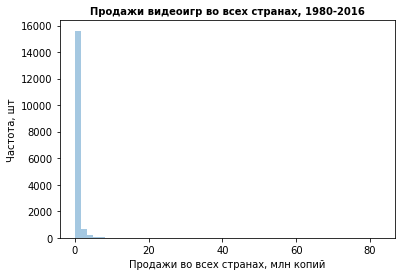

In [99]:
plt.title("Продажи видеоигр во всех странах, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games['all_sales'], kde=False, rug=False, axlabel="Продажи во всех странах, млн копий")
plt.show()

График похож на те, что были по отдельным продажам по регионам. Посмотрим, что произойдем при масшабировании.

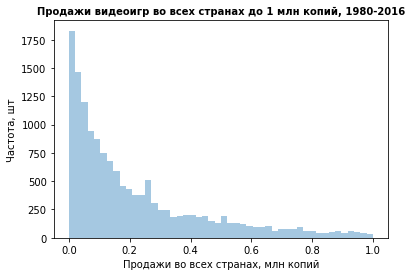

In [100]:
plt.title("Продажи видеоигр во всех странах до 1 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('all_sales < 1')['all_sales'], 
             kde=False, rug=False, axlabel="Продажи во всех странах, млн копий")
plt.show()

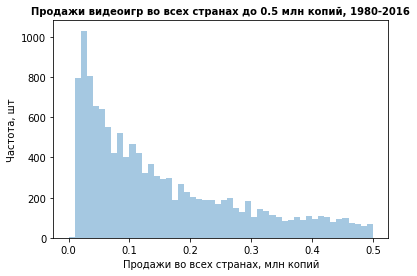

In [101]:
plt.title("Продажи видеоигр во всех странах до 0.5 млн копий, 1980-2016", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=games.query('all_sales < 0.5')['all_sales'], 
             kde=False, rug=False, bins=50, axlabel="Продажи во всех странах, млн копий")
plt.show()

При масштабировании пик около 0 пропал и сместился примерно к 0.01. Теперь распредление выглядит еще более похожим на Пуассона.

### Изменение типов данных

Пройдемся по таблицам и исправим тип данных по столбцам на более оптимальный.

In [102]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 12 columns):
name               16711 non-null object
platform           16711 non-null object
year_of_release    16572 non-null float64
genre              16711 non-null object
na_sales           16711 non-null float64
eu_sales           16711 non-null float64
jp_sales           16711 non-null float64
other_sales        16711 non-null float64
critic_score       8135 non-null float64
user_score         7588 non-null object
rating             16711 non-null object
all_sales          16711 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


Отлично, как раз видно, что пропуски есть только в оценках, но там они и должны быть. Иначе среднее будет неверно считаться.

Итак, до изменения типов данных у нас - 1,5+ MB.

Начнем с значений object, заменим на категориальный тип столбцы platform, genre, rating. Столбец user_score переведем в числовой, а name трогать не будем. Там около 11 тыс уникальных значений (намного больше чем половина от всех значений), переводить в категориальный тип не имеет смысла.

In [103]:
games['user_score'] = pd.to_numeric(games['user_score'])

In [104]:
games['platform'] = games['platform'].astype('category')
games['genre'] = games['genre'].astype('category')
games['rating'] = games['rating'].astype('category')

Для числовых значений посмотрим на максимальные и минимальные значения.

In [105]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16572.0,2006.490828,5.862276,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16711.0,0.263334,0.813609,0.0,0.00,0.08,0.24,41.36
eu_sales,16711.0,0.145063,0.503390,0.0,0.00,0.02,0.11,28.96
jp_sales,16711.0,0.077634,0.308888,0.0,0.00,0.00,0.04,10.22
other_sales,16711.0,0.047348,0.186752,0.0,0.00,0.01,0.03,10.57
critic_score,8135.0,68.969146,13.936036,13.0,60.00,71.00,79.00,98.00
user_score,7588.0,7.125659,1.499686,0.0,6.40,7.50,8.20,9.70
all_sales,16711.0,0.533379,1.548387,0.0,0.06,0.17,0.47,82.54


Год - это целое значение, тут хватит int16. По вещественным - берем float32, он не потеряет нужных знаков. Его возьмем и для оценок, так как float в отличии от int не закрасит пустые значения, которые нам так важны.

In [106]:
games['year_of_release'] = np.int16(games['year_of_release'])
games['na_sales'] = np.float32(games['na_sales'])
games['eu_sales'] = np.float32(games['eu_sales'])
games['jp_sales'] = np.float32(games['jp_sales'])
games['other_sales'] = np.float32(games['other_sales'])
games['all_sales'] = np.float32(games['all_sales'])
games['user_score'] = np.float32(games['user_score'])
games['critic_score'] = np.float32(games['critic_score'])

In [107]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16711.0,1989.801089,182.333015,0.0,2003.00,2007.00,2010.00,2016.000000
na_sales,16711.0,0.263334,0.813609,0.0,0.00,0.08,0.24,41.360001
eu_sales,16711.0,0.145063,0.503390,0.0,0.00,0.02,0.11,28.959999
jp_sales,16711.0,0.077634,0.308888,0.0,0.00,0.00,0.04,10.220000
other_sales,16711.0,0.047348,0.186752,0.0,0.00,0.01,0.03,10.570000
critic_score,8135.0,68.969147,13.936035,13.0,60.00,71.00,79.00,98.000000
user_score,7588.0,7.125659,1.499686,0.0,6.40,7.50,8.20,9.700000
all_sales,16711.0,0.533379,1.548387,0.0,0.06,0.17,0.47,82.540001


In [108]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 12 columns):
name               16711 non-null object
platform           16711 non-null category
year_of_release    16711 non-null int16
genre              16711 non-null category
na_sales           16711 non-null float32
eu_sales           16711 non-null float32
jp_sales           16711 non-null float32
other_sales        16711 non-null float32
critic_score       8135 non-null float32
user_score         7588 non-null float32
rating             16711 non-null category
all_sales          16711 non-null float32
dtypes: category(3), float32(7), int16(1), object(1)
memory usage: 671.5+ KB


Всего 671.5+ KB, почти в 3 сокралили объем памяти. Но при замене года, пропуски у нас заменились на 0. Будем это помнить.

Краткие итоги шага:
- Обработали пропуски,
- Обработали дубликаты,
- Добавили столбец со всеми продажами,
- Изменили типы данных.

А теперь приступаем к анализу.

## Шаг: Исследовательский анализ данных
На данном шаге мы изучим данные и ответим на следующие вопросы:
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой срок появляются новые и исчезают старые платформы?
-  Возьмем данные за соответствующий <b>актуальный период.</b> Определим на основании прошлых вопросов, для помощи построения прогноза на 2017.
- Не будем учитывать в работе данные за <b>предыдущие периоды.</b>
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных.
- Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам и опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? выделяются ли жанры с высокими и низкими продажами.


### Сколько игр выпускалось в разные годы.

Мы уже строили похожий график, но тогда у нас еще были пропуски, которые сейчас мы уже обработали.

In [109]:
games.query('year_of_release != 0').pivot_table(
    index='year_of_release', values='name', aggfunc='count').T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,36,17,14,14,21,16,15,17,...,1204,1442,1430,1271,1153,662,548,581,606,502


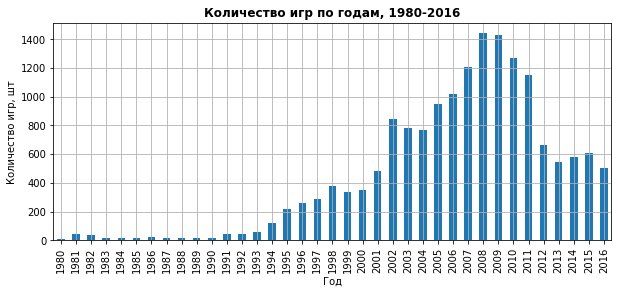

In [110]:
games.query('year_of_release != 0').pivot_table(
    index='year_of_release', values='name', aggfunc='count'
).plot(
    grid=True, figsize=(10,4), kind='bar', legend=False
)
plt.title("Количество игр по годам, 1980-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, шт")
plt.xlabel("Год")
plt.show()

Да, больше всего игр было выпущено в 2008 и 2009 годах (более 1400 игр за год): 1462 и 1456 соответсвенно.

А постепенный рост количества выпускаемых игр начался даже в 1993-1994 годах. Отедельный резкий всплеск был в 2002 году.

После 2009 года начался спад количества выпускаемых игр и с 2012 их выходит всего около 550. Но с 2013 опять начался постепенный рост.

Также мы знаем, что по 2016 году данные не полные. Вероятно 2016 ожидался больше 2015 по представлености игр, но возможно данные собирались раньше и сюда не попали часть игр.

Важны ли данные за все периоды? Для понимания деталей и определенных закономерностей - все данные полезные. Но если мы говорим, что используем данные для прогноза продаж на 2017 год, но использовать продажи 1993 года или 2008 - неправильно. Мы видим, что эти значения сильно отличаются от значений за последние годы. Вероятно процесс выпуска видеоигр в последние годы изменился. И менялся последние 30 лет довольно часто. Поэтому для прогноза лучше опирать на данные с 2012-2013 года, это будет более правильно.

In [111]:
games.query('year_of_release > 2011').pivot_table(index='year_of_release', values='name', aggfunc='count').T

year_of_release,2012,2013,2014,2015,2016
name,662,548,581,606,502


По 2016 году данные не полные, поэтому если взять средний прирост между 2013 и 2014 - +5%, 2014 и 2015 - +4%, то в 2016 скорее всего было бы выпущено 606*1,05 = 636 игры.

Тогда в 2017 планируется к выпуску примерно 667 игра. 

Ориентируемся на рост последних лет, так как обычно общая покупательская способность зависит часто и от внешних факторов (покупательская способность в общем, финансовая стабильность). Поэтому прогноз общих цифр неверно основывать от частного к общему. Тут нужно отталкиваться от общих данных, а из них нам известно, что последние годы идет рост. Поэтому допустим, что этот рост продолжится примерно с такой же скоростью.

Теперь перейдем к другим деталям.

### Изменение продаж по платформам. За какой срок появляются новые и исчезают старые платформы?

Посмотрим на продажи: как они распределялись по годам, а как по платформам. А для самых продаваемых платформ посмотрим отдельно на распределение продаж по годам.

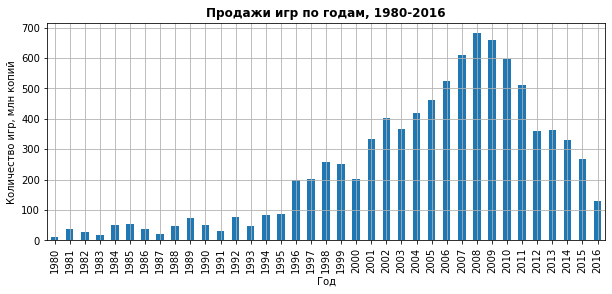

In [112]:
games.query('year_of_release != 0').pivot_table(
    index='year_of_release', values='all_sales', aggfunc='sum'
).plot(
    grid=True, figsize=(10,4), kind='bar', legend=False
)
plt.title("Продажи игр по годам, 1980-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, млн копий")
plt.xlabel("Год")
plt.show()

Уже нет такого резкого падения в 2012 году, явного пика в 2002. Хотя пики продаж также пришлись на 2008-2009. Оказывается количество выпускаемых игр не прямопропорционально продажам. А также мы видим обратный эффект для последних лет. Падение продаж продолжается, и не обернулось ростом в 2012 году в отличии от количества выпускаемых игр. 

In [113]:
games.query('year_of_release > 2011').pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').T

year_of_release,2012,2013,2014,2015,2016
all_sales,360.570007,362.109985,331.529999,267.980011,129.940002


2014 год потерял в продажах 10% от 2013 года, а 2015 относительно 2014 около 20%. Тогда в 2016 примерные продажи будут на 15% относительно 2015: 226 млн копий. А в 2017 еще на 15% меньше - 192 млн копий.

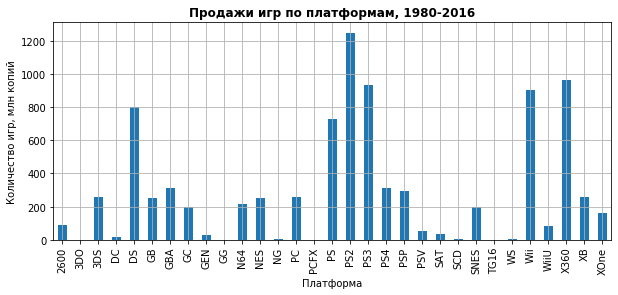

In [114]:
games.query('year_of_release != 0').pivot_table(
    index='platform', values='all_sales', aggfunc='sum'
).plot(
    grid=True, figsize=(10,4), kind='bar', legend=False
)
plt.title("Продажи игр по платформам, 1980-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, млн копий")
plt.xlabel("Платформа")
plt.show()

Очень не равномерное распределение, попробуем выявить ТОП платформ.

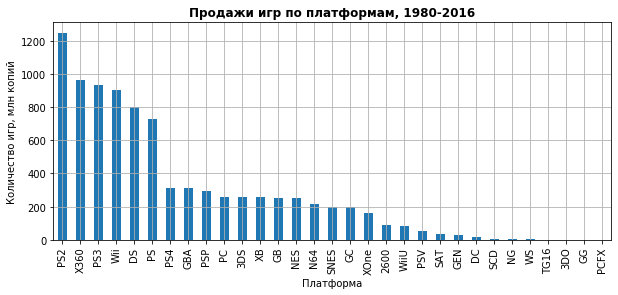

In [115]:
sales_by_platform = games.query('year_of_release != 0').pivot_table(
    index='platform', values='all_sales', aggfunc='sum'
).reset_index()

sales_by_platform.columns = ['platform','all_sales']

sales_by_platform.sort_values(by='all_sales', ascending=False).plot(
    grid=True, figsize=(10,4), x='platform',kind='bar', legend=False
)
plt.title("Продажи игр по платформам, 1980-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, млн копий")
plt.xlabel("Платформа")
plt.show()

Выделяеся сильно 6 платформ. Возьмем их за ТОП.

Сохраним названия популярных платформ в 1 список.

In [116]:
top6_platforms = sales_by_platform.sort_values(
    by='all_sales', ascending=False
)['platform'].head(6).reset_index()

top6_platforms = top6_platforms['platform']

top6_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: category
Categories (31, object): [2600, 3DO, 3DS, DC, ..., WiiU, X360, XB, XOne]

Теперь для каждой из этих платформ отдельно построим график продаж по годам.

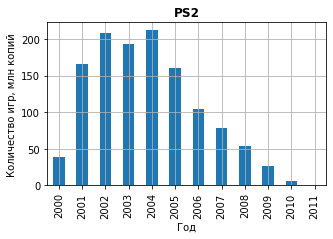

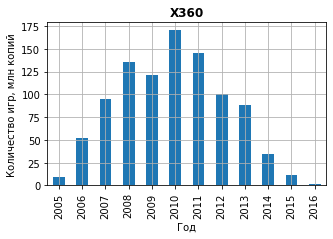

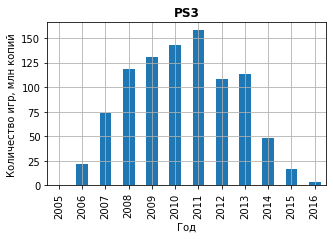

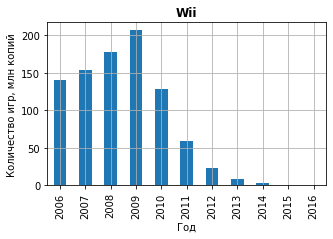

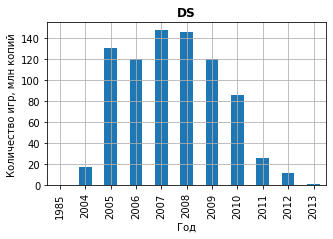

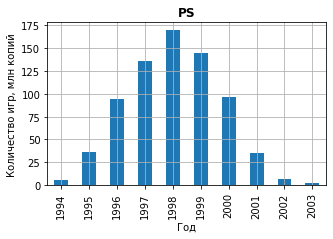

In [117]:
for element in top6_platforms:
    plt.subplots
    games.query('platform == @element and year_of_release != 0').pivot_table(
        index='year_of_release', values='all_sales', aggfunc='sum'
    ).plot(
        grid=True, figsize=(5,3), kind='bar', legend=False
    )
    
    plt.title(element, fontweight='bold', size='large')
    plt.ylabel("Количество игр, млн копий")
    plt.xlabel("Год")
    plt.show()

Если посмотреть на графики внимательно, то видно, что от первого года с хорошей прибылью до года, когда начинается спад - проходит примерно 4 года.
- PS2: от 2001 до 2004, в 2005 уже спад.
- X360: примерно с 2008 по 2011
- PS3: примерно с 2008 по 2011
- Wii: с 2006 по 2009.
- DS: с 2005 по 2008/2009 год.
- PS: с 1996 по 1999.

Можно также взять и 5 лет, но за 5 лет у некоторых платформ уже начинается активный спад. То есть поведение сильно меняется и для расчета прогноза на еще 1 год, это будет уже вероятно не так правдоподобно. Поэтому остановимся на 4.

### Прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают?

Мы решили выше, что срок жизни платформ, когда продажи достаточно высоки и не начался активный спад - 4 года. Значит актуальный период для прогноза на 2017 год и поиска перспективных: 2014, 2015, 2016 (вместе с 2017 как раз будет 4 года - срок жизни платформ). Предыдущие периоды, до 2013 года включительно не будем использовать.

Так как данные за 2016 год неполные, то для их восстановления будем брать: 2014, 2015. (Если будем брать и 2013, то 2016, и как следствие 2017 будет сильно зависеть от 2013, а это уже не соответсвует актуальному периоду. То есть был сильный рост с 2014 к 2013, то при моелировании этот рост повлияет и у нас былет сильный рост 2017 к 2016, этого уже как мы видим выше почти не бывает, платформы так долго не растут.)

In [118]:
platforms_actual_data = games.query('year_of_release > 2013').pivot_table(
    index=['platform','year_of_release'], values='all_sales', aggfunc='sum'
).reset_index()

platforms_actual_data.columns = ['platform','year_of_release','all_sales']

platforms_actual_data.head()

,platform,year_of_release,all_sales
0,3DS,2014,43.760002
1,3DS,2015,27.779999
2,3DS,2016,15.140000
3,PC,2014,13.280000
4,PC,2015,8.520000


Скоректирем данные за 2016 год. Сравним имеющиеся данные за 2016 год и спрогнозируемые по прошлым годам. И возьмем от этого максимум. До замены посмотрим какие были продажи за 2016 год.

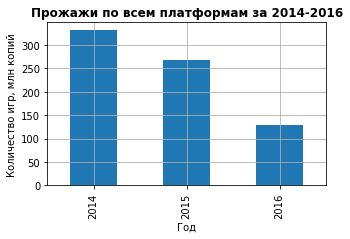

In [119]:
platforms_actual_data.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
        grid=True, figsize=(5,3), kind='bar', legend=False
    )
    
plt.title("Прожажи по всем платформам за 2014-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, млн копий")
plt.xlabel("Год")
plt.show()

Напишем функцию для корректировки продаж 2016, будем сравнивать среднее по прошлым годам и актуальные данные за 2016. И возьмем от этого максимум.

In [121]:
def forecast_2016(platform):
    forecast_for_2016 = (
        platforms_actual_data.query('platform == @platform and year_of_release == 2014')['all_sales'].mean() +
        platforms_actual_data.query('platform == @platform and year_of_release == 2015')['all_sales'].mean()
    ) * 0.5
    
    sales_2016 = platforms_actual_data.query('platform == @platform and year_of_release == 2016')['all_sales'].mean()
    
    result = np.maximum(forecast_for_2016, sales_2016) 
    return result

In [122]:
forecast_2016('PS4')

109.44999694824219

In [123]:
forecast_2016('Wii')

2.444999933242798

Выше мы написали функцию для прогноза, посмотрим на значения в 2016 до замены и на что мы должны заменить их.

In [124]:
platforms_actual_data.query('platform == "Wii"')

,platform,year_of_release,all_sales
17,Wii,2014,3.75
18,Wii,2015,1.14
19,Wii,2016,0.18


In [125]:
platforms_actual_data.query('platform == "PS4"')

,platform,year_of_release,all_sales
9,PS4,2014,100.000000
10,PS4,2015,118.900002
11,PS4,2016,69.250000


In [126]:
for element in platforms_actual_data['platform'].unique():
    platforms_actual_data.loc[(
        platforms_actual_data['year_of_release'] == 2016
    )&(platforms_actual_data['platform'] == element),'all_sales'] = forecast_2016(element)

In [127]:
platforms_actual_data.query('platform == "Wii"')

,platform,year_of_release,all_sales
17,Wii,2014,3.750
18,Wii,2015,1.140
19,Wii,2016,2.445


In [128]:
platforms_actual_data.query('platform == "PS4"')

,platform,year_of_release,all_sales
9,PS4,2014,100.000000
10,PS4,2015,118.900002
11,PS4,2016,109.449997


Проверили, что встали именно нужные значения (причем для одной платформы они растут, для другой падают), посмотрим как ведут себя общие продажи. 

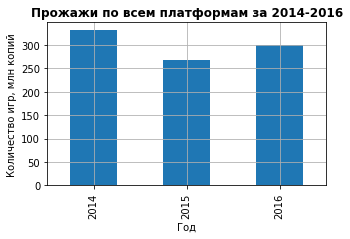

In [129]:
platforms_actual_data.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(
        grid=True, figsize=(5,3), kind='bar', legend=False
    )
    
plt.title("Прожажи по всем платформам за 2014-2016", fontweight='bold', size='large')
plt.ylabel("Количество игр, млн копий")
plt.xlabel("Год")
plt.show()

Скорректировали данные за 2016 год (суммарно видим, что продажи подросли). Теперь приступим к прогнозу данных за 2017 год.

In [130]:
def forecast_2017(platform):
#    koefficient_1 = (
#        platforms_actual_data.query('platform == @platform and year_of_release == 2015')['all_sales'].mean()
#    ) / platforms_actual_data.query('platform == @platform and year_of_release == 2014')['all_sales'].mean()
#    koefficient_2 = (
#        platforms_actual_data.query('platform == @platform and year_of_release == 2016')['all_sales'].mean()
#    ) / platforms_actual_data.query('platform == @platform and year_of_release == 2015')['all_sales'].mean()
    
#    koefficient = (koefficient_1 + koefficient_2) / 2
    
    forecast_for_2017 = (
        platforms_actual_data.query('platform == @platform and year_of_release == 2016')['all_sales'].mean() +
        platforms_actual_data.query('platform == @platform and year_of_release == 2015')['all_sales'].mean() +
        platforms_actual_data.query('platform == @platform and year_of_release == 2014')['all_sales'].mean()
    ) / 3
    
    return forecast_for_2017

In [131]:
forecast_2017('PS4')

109.4500020345052

In [132]:
for element in platforms_actual_data['platform'].unique():
    platforms_actual_data.loc[len(platforms_actual_data)] = [element, 2017, forecast_2017(element)]

In [133]:
platforms_actual_data.query('year_of_release == 2017').sort_values(by='all_sales', ascending=False)

,platform,year_of_release,all_sales
32,PS4,2017,109.449999
38,XOne,2017,57.105000
29,3DS,2017,35.769999
31,PS3,2017,32.290001
37,X360,2017,23.350001
36,WiiU,2017,19.190001
30,PC,2017,10.900000
34,PSV,2017,9.075000
35,Wii,2017,2.445000
33,PSP,2017,NaN


Проверим почему у нас получились nan. Возможно по этим платформам уже не было продаж в какой-то из последних годов начиная с 2014 года.

In [134]:
platforms_actual_data.query('platform == "PSP"')

,platform,year_of_release,all_sales
12,PSP,2014,0.24
13,PSP,2015,0.12
33,PSP,2017,NaN


Действительно, по этим платформам уже не было продаж в 2016 году. Удалим эти строки.

*** Да, важно, что функция для корректировки 2016 года работала именно как увеличение продаж по платформе. Если в наших неполных данных не нашлось ни одной игры, по которой не было продаж в 2016 году, то считаем, что это платформа уже не настолько нам важна. Именно такой и стала PSP, да и сейчас мы видим, что в 2015 продажи там настолько малы, что в 2016 их действительно могло и не быть. В любом случае, для 2017 - она не занчительна.

In [135]:
platforms_actual_data = platforms_actual_data.dropna(subset=['all_sales'])

platforms_actual_data.query('year_of_release == 2017').sort_values(by='all_sales', ascending=False)

,platform,year_of_release,all_sales
32,PS4,2017,109.449999
38,XOne,2017,57.105000
29,3DS,2017,35.769999
31,PS3,2017,32.290001
37,X360,2017,23.350001
36,WiiU,2017,19.190001
30,PC,2017,10.900000
34,PSV,2017,9.075000
35,Wii,2017,2.445000


Кажется, самой перспективной с отрывом выглядит PS4, ее потенциальные продажи в 2017 году почти 109 млн копий. Также наибольший прогноз продаж:  XOne - 57 млн копий, 3DS - 35 млн копий, PS3 - 32 млн копий, X360 - 23 млн копий.


Теперь возьмем эти 5 самых потенциально успешных платформ и посмотрим внимательнее на продажи по каждой.

In [136]:
top5_forecast_2017 = platforms_actual_data.query('year_of_release == 2017').sort_values(
    by='all_sales', ascending=False
).head()['platform'].unique()

top5_forecast_2017

array(['PS4', 'XOne', '3DS', 'PS3', 'X360'], dtype=object)

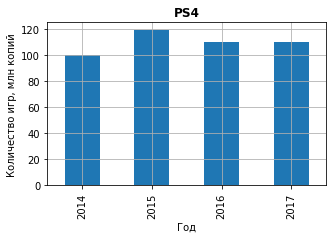

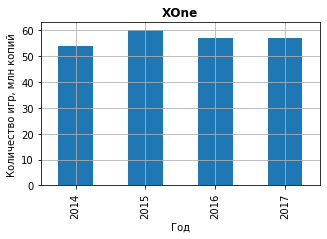

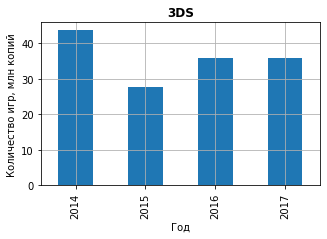

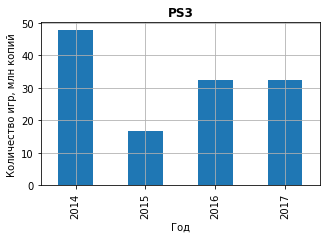

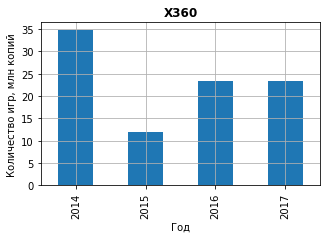

In [137]:
for element in top5_forecast_2017:
    platforms_actual_data.query('platform == @element').pivot_table(
        index='year_of_release', values='all_sales'
    ).plot(
        grid=True, figsize=(5,3), kind='bar', legend=False
    )
    
    plt.title(element, fontweight='bold', size='large')
    plt.ylabel("Количество игр, млн копий")
    plt.xlabel("Год")
    plt.show()

Оказываются росли последние годы из них только PS4 и XOne. Это самые перспективные платформы, у них и самые большие продажи: PS4 (более 100 млн копий в год) и XOne (более 50 млн копий в год). По остальным платформам наблюдалось падение продаж, на них лучше не заострять внимание маркетологов.

### Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам и опишем результат.

Сначала посмотрим на ящик по всем платформам.

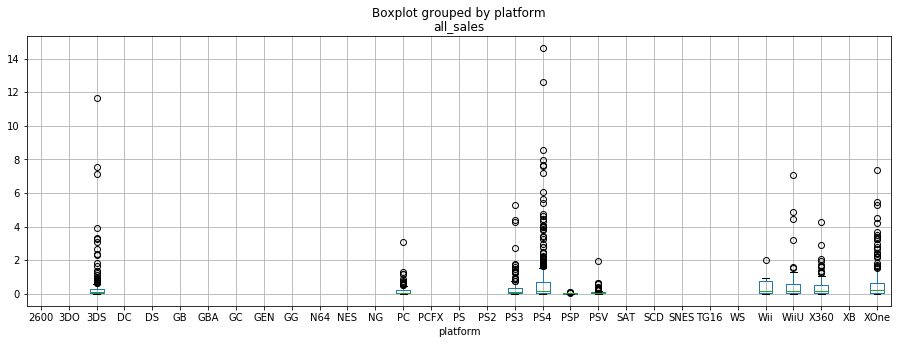

In [138]:
#библиотека ругается на разную длину наборов данных, уберем предупреждение.
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
games.query('year_of_release > 2013').reset_index().boxplot(column='all_sales', by='platform', figsize=(15,5))
plt.show()

У платформ выделяются пиковые значения около 14 млн, но это всего лишь исключение. Сконцентрируемся на платформах, которые имеют значение для 2017 года. Посмотрим на распределение.

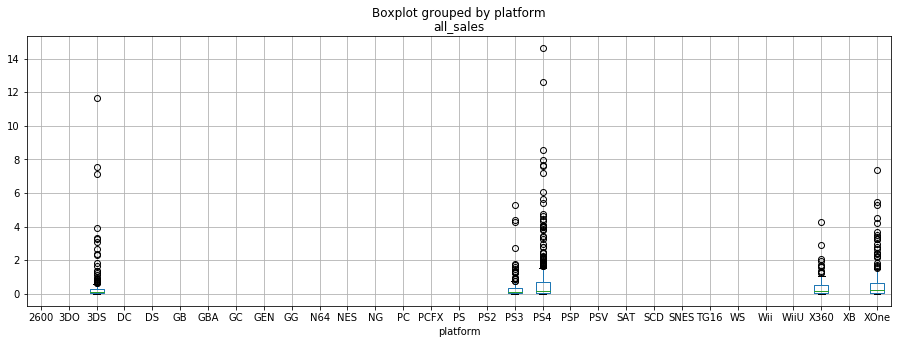

In [139]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
games.query('platform in @top5_forecast_2017 and year_of_release > 2013').reset_index().boxplot(
    column='all_sales', by='platform', figsize=(15,5)
)
plt.show()

Уже видно, что для актуальных платформ максимальные значения около 14 млн копий было для PS4, и 12 млн для 3DS. Но в целом ящики все-равно еле различимы, длинный хвост говорит о том, что хорошо продаваемые игры - это в основном редкое исключение. Посмотрим внимательнее на каждый ящик.

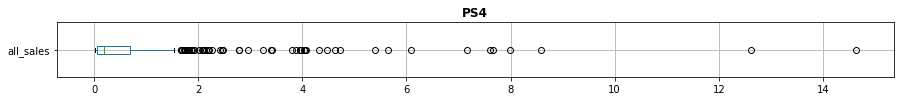

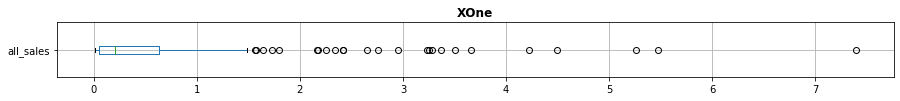

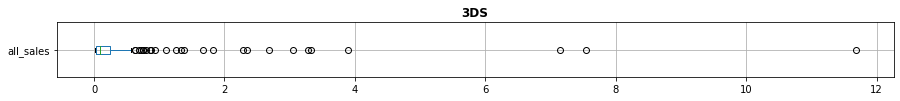

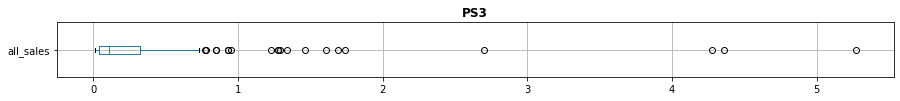

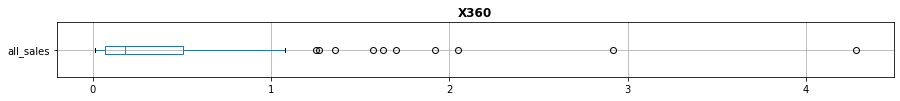

In [140]:
for element in top5_forecast_2017:
    games.query('platform == @element and year_of_release > 2013').boxplot(
        column='all_sales', vert=False, figsize=(15,1)
    )
    plt.title(element, fontweight='bold', size='large')
    plt.show()

Видим, что размер ящика везде меньше 1 млн, усы в основном заканчиваются до 2 млн. Именно так и продается большинство игр, а хорошо продаваемые игры (до 7-14 млн) уже редкость.

### Влияние  отзывов пользователей и критиков. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Соотнесем выводы с продажами игр на других платформах.

Возьмем нашего лидера - PS4.

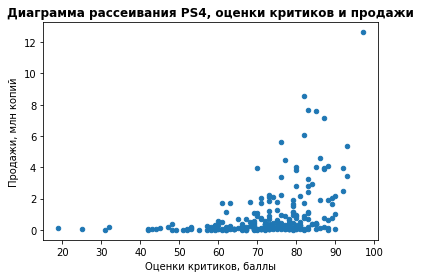

In [141]:
games.query('platform == "PS4" and year_of_release > 2013').plot(
        x='critic_score', y='all_sales', kind='scatter'
)  
plt.title("Диаграмма рассеивания PS4, оценки критиков и продажи", fontweight='bold', size='large')
plt.ylabel("Продажи, млн копий")
plt.xlabel("Оценки критиков, баллы")
plt.show()

Как видим, большинство игр все равно продаются не так хорошо, независимо от оценок. Но если игра продавалась хорошо, то и совсем низких оценок у нее нет. А у самой продаваемой игры и оценка максимальная. Сравним с оценками пользователей.

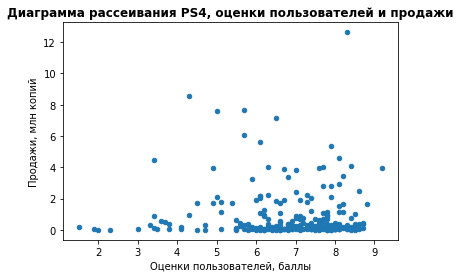

In [142]:
games.query('platform == "PS4" and year_of_release > 2013').plot(
        x='user_score', y='all_sales', kind='scatter'
)  
plt.title("Диаграмма рассеивания PS4, оценки пользователей и продажи", fontweight='bold', size='large')
plt.ylabel("Продажи, млн копий")
plt.xlabel("Оценки пользователей, баллы")
plt.show()

Также, большиство игр продается мало, несмотря на оценки. Но тут, кажется, даже меньше зависимоти. У игр, которые в среднем продавались хорошо есть и плохие оценки. Они больше разбросаны, а не смещены к правой стороне графика. Посмотрем на корреляцию продаж и др. факторов.

In [143]:
games.query('platform == "PS4" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.214338
na_sales           0.928090
eu_sales           0.958109
jp_sales           0.538524
other_sales        0.998252
critic_score       0.402661
user_score        -0.040132
all_sales          1.000000
Name: all_sales, dtype: float64

Наши выводы подвердились, продажи почти не зависят от оценок пользователей: -0,04 коэффициент корреляции. С оценками критиков зависимость больше: 0,4. Хотя все еще далеко до единицы. 

Продажи в регионах - это итак линейная зависимость, но среди всех регионов наименьший эффект на общие продажи влияет Япония (0,5 относительно более 0,9 для других регионах).

Посмотрим на другие платформы из нашего топ-5 актуальных платформ.

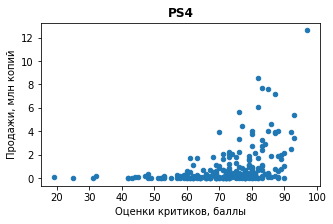

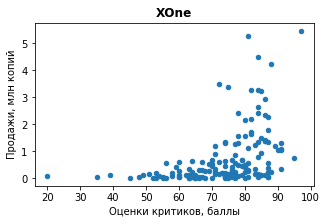

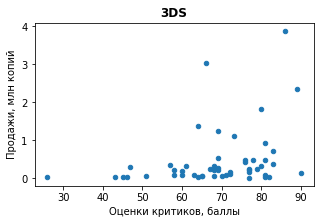

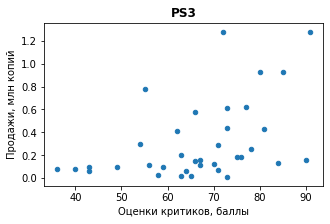

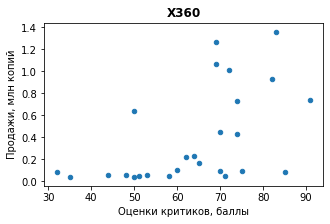

In [144]:
for element in top5_forecast_2017:
    games.query('platform == @element and year_of_release > 2013').plot(
        x='critic_score', y='all_sales', kind='scatter', figsize=(5,3)
)
    plt.title(element, fontweight='bold', size='large')
    plt.ylabel("Продажи, млн копий")
    plt.xlabel("Оценки критиков, баллы")
    plt.show()

Ситуация похожая на PS4, зависмость есть, но небольшая. Посмотрим теперь на оценки позьзователей.

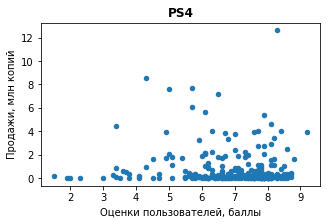

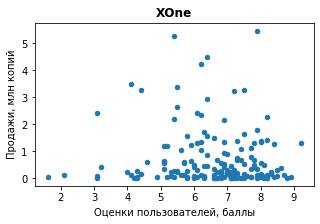

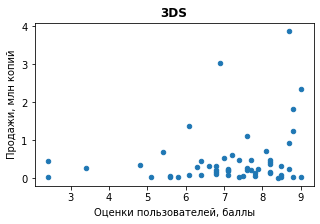

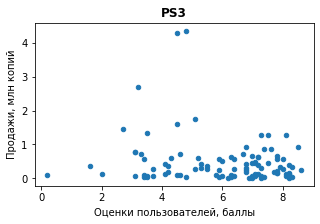

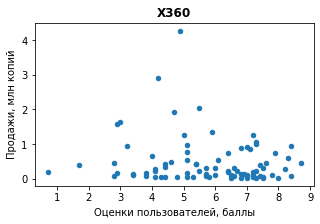

In [145]:
for element in top5_forecast_2017:
    games.query('platform == @element and year_of_release > 2013').plot(
        x='user_score', y='all_sales', kind='scatter', figsize=(5,3)
)
    plt.title(element, fontweight='bold', size='large')
    plt.ylabel("Продажи, млн копий")
    plt.xlabel("Оценки пользователей, баллы")
    plt.show()

В среднем картина повторилась. Кроме 3DS - там зависимость больше. Сравним коээфициенты корреляции.

In [146]:
games.query('platform == "PS4" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.214338
na_sales           0.928090
eu_sales           0.958109
jp_sales           0.538524
other_sales        0.998252
critic_score       0.402661
user_score        -0.040132
all_sales          1.000000
Name: all_sales, dtype: float64

In [147]:
games.query('platform == "XOne" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.231327
na_sales           0.969688
eu_sales           0.897802
jp_sales           0.460953
other_sales        0.995134
critic_score       0.428677
user_score        -0.070384
all_sales          1.000000
Name: all_sales, dtype: float64

In [148]:
games.query('platform == "3DS" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.077659
na_sales           0.926824
eu_sales           0.902940
jp_sales           0.844990
other_sales        0.933912
critic_score       0.314117
user_score         0.215193
all_sales          1.000000
Name: all_sales, dtype: float64

In [149]:
games.query('platform == "PS3" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.215222
na_sales           0.899533
eu_sales           0.945808
jp_sales           0.149133
other_sales        0.990464
critic_score       0.446575
user_score        -0.166761
all_sales          1.000000
Name: all_sales, dtype: float64

In [150]:
games.query('platform == "X360" and year_of_release > 2013').corr()['all_sales']

year_of_release   -0.238375
na_sales           0.944965
eu_sales           0.820443
jp_sales           0.148872
other_sales        0.990365
critic_score       0.525723
user_score        -0.138445
all_sales          1.000000
Name: all_sales, dtype: float64

- Для XOne корреляция по оценкам почти совпадает с PS4: коээфициенты корреляции: 0,42 с критиками, и -0,07 с пользователями. Рынок Японии не так влияет сильно также: 0,46.
- По 3DS оценка критиков связана с продажами чуть меньше, но зато оценки пользователй больше коррелируют: 0,31 и 0,21 соответсвенно. Рынок Японии уже сильнее влияет: 0,84.
- По PS3 ситуация похожа на PS4: корреляция с критиками: 0,44 и пользователями -0,1. Рынок Японии совсем не силен: 0,14. 
- По X360 ситуация больше похожа на PS4, тут зависимость с оценками критиков : 0,52. а с пользователями тоже почти -0.13. Рынок Японии совсем не силен: 0,14.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? выделяются ли жанры с высокими и низкими продажами.

Посмотрим на общие продажи по жанрам, средние на игру и количество выпускаемых игр.

In [151]:
genre_data = (games.query('year_of_release > 2013')
              .pivot_table(index='genre', values='all_sales', aggfunc=['count','sum','mean'])
              .reset_index()
             )

genre_data.columns = ['genre', 'count_games','all_sales','avr_sales']

genre_data.sort_values(by='all_sales', ascending=False)

,genre,count_games,all_sales,avr_sales
0,Action,619,199.360001,0.322068
8,Shooter,128,170.940002,1.335469
10,Sports,161,109.480003,0.680000
7,Role-Playing,221,101.440002,0.459005
3,Misc,113,37.549999,0.332301
2,Fighting,60,28.219999,0.470333
6,Racing,69,27.520000,0.398841
4,Platform,38,18.090000,0.476053
1,Adventure,185,17.549999,0.094865
9,Simulation,44,13.130000,0.298409


Больше всего продали игр для жанра Action с 2014 года: почти 200 млн копий. Больше всего игр вышло там же: 619. А вот в среднем самые успешные игры не у этого жанра. В лидерах: Shooter (1,3 млн на игру) и Sports (0,68 млн на игру).

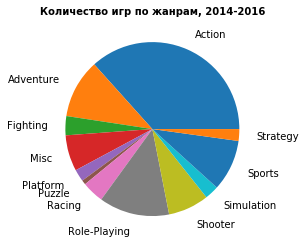

In [153]:
names = genre_data['genre']
values1 = genre_data['count_games']
values2 = genre_data['all_sales']
values3 = genre_data['avr_sales']  
                     
plt.pie(values1, labels=names, labeldistance=1.2);
plt.title("Количество игр по жанрам, 2014-2016", fontweight='bold', size='medium')
plt.show()

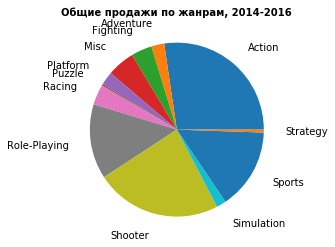

In [154]:
plt.pie(values2, labels=names, labeldistance=1.25);
plt.title("Общие продажи по жанрам, 2014-2016", fontweight='bold', size='medium')
plt.show()

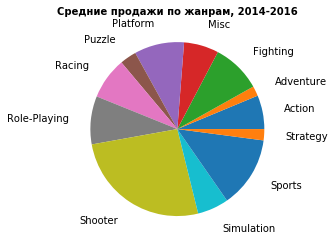

In [155]:
plt.pie(values3, labels=names, labeldistance=1.25);
plt.title("Средние продажи по жанрам, 2014-2016", fontweight='bold', size='medium')
plt.show()

Жанр Shooter действительно выгядит привлекательным, как и Sports. Шанс произвести там успешную игру намного больше чем в других.

Action и Role-Playing также приносит много продаж, но в среднем на игру уступают.

А вот Adventure	выглядит неперспективным жанром - игр выходит много, а в сумме и среднем продается очень плохо.

## Шаг: Портрет пользоватей по регионам
На данном шаге мы определим портрет пользователя для каждого региона: NA, EU, JP. Для этого опредим:
- Топ-5 самых популярных платформ. Опишем различия в долях продаж;
- Топ-5 самых популярных жанров. Опишем разницу.
- Поймем: Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для этого шага будем анализировать продажи также с 2014 года.

### Регион Северная Америка

In [156]:
na_sales_by_platform = (games.query('year_of_release > 2013')
                        .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                        .reset_index()
                       )

na_sales_by_platform.columns = ['platform','na_sales']

na_sales_by_platform.sort_values(by='na_sales', ascending=False).head()

,platform,na_sales
18,PS4,98.610001
30,XOne,81.269997
28,X360,28.299999
2,3DS,22.639999
17,PS3,22.049999


И так посмотрим на наш ТОП-5. Лидеры: PS4 - 98 млн копий, XOne - 81 млн, X360 - 28 млн, 3DS - 22,5 млн, PS3 - 22 млн.

In [157]:
na_sales_by_genre = (games.query('year_of_release > 2013')
                     .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                     .reset_index()
                    )

na_sales_by_genre.columns = ['genre','na_sales']

na_sales_by_genre.sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
8,Shooter,79.019997
0,Action,72.529999
10,Sports,46.130001
7,Role-Playing,33.470001
3,Misc,15.050000


По жанрам лидеры по Северной Америке: Shooter - 79 млн, Action - 72 млн, Sports - 46 млн, Role-Playing - 33,5, Misc	- 15,05.

In [158]:
rating_na = (games.query('year_of_release > 2013')
             .pivot_table(index='rating', values='na_sales', aggfunc=['sum','mean'])
             .reset_index()
            )

rating_na.columns = ['rating', 'na_sales','avr_na_sales']

rating_na.sort_values(by='na_sales', ascending=False).head()

,rating,na_sales,avr_na_sales
5,Mature,96.419998,0.363849
8,Without Rating,64.720001,0.086409
2,Everyone,50.740002,0.231689
7,Teen,38.950001,0.143727
3,Everyone 10 and older,33.230000,0.179622


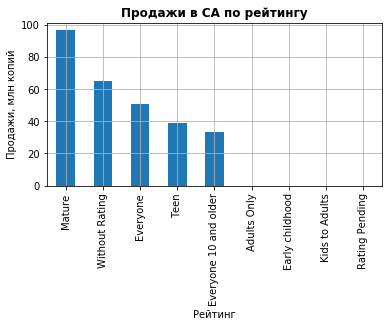

In [159]:
rating_na.sort_values(by='na_sales', ascending=False).plot(
        x='rating', y='na_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Продажи в СА по рейтингу", fontweight='bold', size='large')
plt.ylabel("Продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

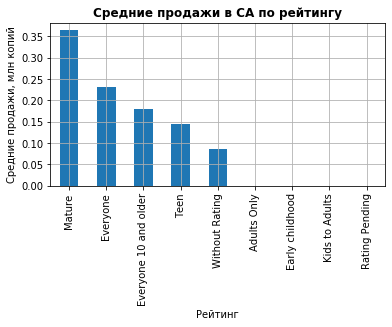

In [160]:
rating_na.sort_values(by='avr_na_sales', ascending=False).plot(
        x='rating', y='avr_na_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Средние продажи в СА по рейтингу", fontweight='bold', size='large')
plt.ylabel("Средние продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

Как видим большую часть продаж в СА составляют «M» («Mature») — «Для взрослых», и что интересно игры без рейтинга.
Но в среднем на 1 игру игры без рейтинга опустились ниже, а в среднем в дополнении к играм "Для взрослых" хорошо продаются игры: «E» («Everyone») — «Для всех» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

###  Регион Европа

In [161]:
eu_sales_by_platform = (games.query('year_of_release > 2013')
                        .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                        .reset_index()
                       )

eu_sales_by_platform.columns = ['platform','eu_sales']

eu_sales_by_platform.sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales
18,PS4,130.039993
30,XOne,46.250000
17,PS3,25.539999
13,PC,17.969999
2,3DS,16.120001


Лидеры: PS4 - 130 млн копий, XOne - 46 млн, PS3	 - 25 млн, PC - 18 млн, 3DS - 16 млн.

In [162]:
eu_sales_by_genre = (games.query('year_of_release > 2013')
                     .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                     .reset_index()
                    )

eu_sales_by_genre.columns = ['genre','eu_sales']

eu_sales_by_genre.sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
0,Action,74.680000
8,Shooter,65.519997
10,Sports,45.730000
7,Role-Playing,28.170000
6,Racing,14.130000


По жанрам лидеры по Европе: Action - 74 млн, Shooter - 65 млн, Sports - 46 млн, Role-Playing - 28 млн, Racing - 14.

In [163]:
rating_eu = (games.query('year_of_release > 2013')
             .pivot_table(index='rating', values='eu_sales', aggfunc=['sum','mean'])
             .reset_index()
            )

rating_eu.columns = ['rating', 'eu_sales','avr_eu_sales']

rating_eu.sort_values(by='eu_sales', ascending=False).head()

,rating,eu_sales,avr_eu_sales
5,Mature,93.440002,0.352604
8,Without Rating,58.950001,0.078705
2,Everyone,58.060001,0.265114
7,Teen,34.070000,0.125720
3,Everyone 10 and older,26.160000,0.141405


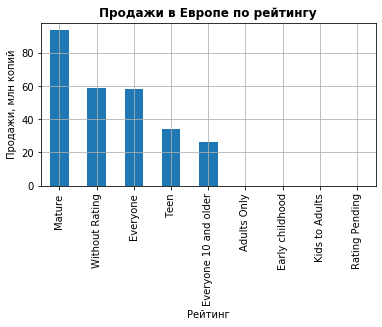

In [164]:
rating_eu.sort_values(by='eu_sales', ascending=False).plot(
        x='rating', y='eu_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Продажи в Европе по рейтингу", fontweight='bold', size='large')
plt.ylabel("Продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

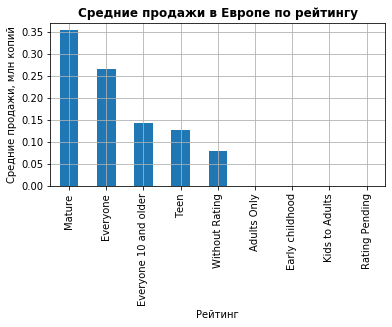

In [165]:
rating_eu.sort_values(by='avr_eu_sales', ascending=False).plot(
        x='rating', y='avr_eu_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Средние продажи в Европе по рейтингу", fontweight='bold', size='large')
plt.ylabel("Средние продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

Абсолютно аналогичная ситуация с Европой, как и в СА.

###  Регион Япония

In [166]:
jp_sales_by_platform = (games.query('year_of_release > 2013')
                        .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                        .reset_index()
                       )

jp_sales_by_platform.columns = ['platform','jp_sales']

jp_sales_by_platform.sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales
2,3DS,44.240002
18,PS4,15.020000
20,PSV,14.540000
17,PS3,11.220000
27,WiiU,7.310000


Лидеры совсем другие, как было и видно ранее за счет коэффициэтов корреляции с общими продажами: 

3DS - 44 млн копий, PS4 - 15 млн, PSV - 14 млн, PS3 - 11 млн, WiiU - 7,3 млн.


Если Северная Америка и Европа совпадают по лидерам (PS4, XOne), различия начинаются с 3 места, то Япония ведет себя координально по другому. В Японии лидер - 3DS, а XOne вообще не попал в ТОП-5.

In [167]:
jp_sales_by_genre = (games.query('year_of_release > 2013')
                     .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                     .reset_index()
                    )

jp_sales_by_genre.columns = ['genre','jp_sales']

jp_sales_by_genre.sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


По жанрам лидеры по Японии: Role-Playing - 31 млн, Action - 29,5 млн, Fighting - 6 млн,  Misc - 5,5 млн, Shooter - 9.

Опять совершенно другой портфель для Японии, если у Северной Америки и Европы в лидерах Action и Shooter, но у Японии неожиданно Role-Playing. А Shooter вообще соввем слаб.

In [168]:
rating_jp = (games.query('year_of_release > 2013')
             .pivot_table(index='rating', values='jp_sales', aggfunc=['sum','mean'])
             .reset_index()
            )

rating_jp.columns = ['rating', 'jp_sales','avr_jp_sales']

rating_jp.sort_values(by='jp_sales', ascending=False).head()

,rating,jp_sales,avr_jp_sales
8,Without Rating,56.900002,0.075968
7,Teen,14.780000,0.054539
2,Everyone,8.940000,0.040822
5,Mature,8.010000,0.030226
3,Everyone 10 and older,4.460000,0.024108


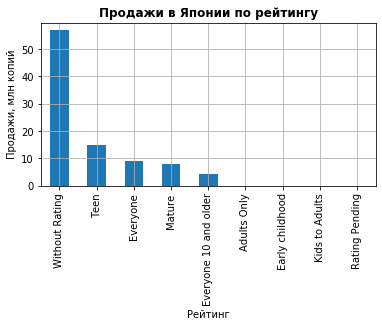

In [169]:
rating_jp.sort_values(by='jp_sales', ascending=False).plot(
        x='rating', y='jp_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Продажи в Японии по рейтингу", fontweight='bold', size='large')
plt.ylabel("Продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

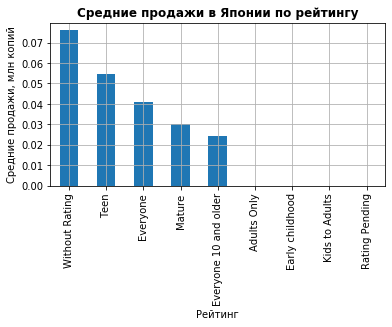

In [170]:
rating_jp.sort_values(by='avr_jp_sales', ascending=False).plot(
        x='rating', y='avr_jp_sales', grid=True, figsize=(6,3), kind='bar', legend=False
    )
plt.title("Средние продажи в Японии по рейтингу", fontweight='bold', size='large')
plt.ylabel("Средние продажи, млн копий")
plt.xlabel("Рейтинг")
plt.show()

Игры без рейтинга продаются лучше всего в Японии как и суммарно, так и в среднем на 1 игру. А вот игры для всзрослых, в отичии от Европы и СА не попали в лидеры. Лидеры в Японии кроме игр без рейтинга - «T» («Teen») — «Подросткам» и «E» («Everyone») — «Для всех».


Итого: портреты пользователя в Северной Америке и Европе похожи, а вот с пользователями Японии есть сильные отличия.

## Шаг: Проверка Гипотез
На данном шаге мы проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports Разные.

### Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Данная гипотеза - это гипотеза о равенстве средних двух генеральных совокупностей. Это и будет нулевая гипотеза H₀: средние у совокупностей равны.

О неравенстве средних - это будет альтернативная гипотеза H₁.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Он как раз поможет нам понять зависимость.

Пороговое значение alpha зададим как 0.05 (критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу). Мы объявили его в самом начале.

Единственное необходимо понять насколько различаются дисперсии в выборках. Для этого применим тест Левене.

Будем брать все данные за все годы, так как по PC будет не полные данные.

In [171]:
np.var(games.query('platform == "XOne" and user_score.notnull()')['user_score'])

1.8965188

In [172]:
np.var(games.query('platform == "PC" and user_score.notnull()')['user_score'])

2.337747

In [173]:
alpha = 0.05

In [174]:
levene_result = st.levene(
    games.query(
        'platform == "XOne" and user_score.notnull()'
    )['user_score'], games.query(
        'platform == "PC" and user_score.notnull()'
    )['user_score']
)
levene_result

LeveneResult(statistic=1.22125121592793, pvalue=0.26939503805191317)

In [175]:
def equal_var_result(pvalue):
    if pvalue < alpha:
        return 'Берем equal_var=False'
    else:
        return 'Берем equal_var=True'

equal_var_result(levene_result.pvalue)

'Берем equal_var=True'

Теперь применим t-тест.

In [176]:
sample_1 = games.query('platform == "XOne" and user_score.notnull()')['user_score']
sample_2 = games.query('platform == "PC" and user_score.notnull()')['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var=True)
results.pvalue

1.389619542521153e-05

In [177]:
def hypothesis_result(pvalue):
    if pvalue < alpha:
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не получилось отвергнуть нулевую гипотезу'

hypothesis_result(results.pvalue)

'Отвергаем нулевую гипотезу'

Отвергаем нашу гипотезу, о том что средние оценки равны. Скорее всего они различаются.

### Гипотеза "Средние пользовательские рейтинги жанров Action и Sports Разные"

Данная гипотеза - это гипотеза о неравенстве средних двух генеральных совокупностей. Нулевая гипотеза H₀ будет: средние пользовательские рейтинги жанров Action и Sports равны.

Наша гипотеза о неравенстве средних - это будет альтернативная гипотеза H₁.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Он как раз поможет нам понять зависимость.

Пороговое значение alpha зададим как 0.05 (критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу). Мы объявили его в самом начале.

Единственное необходимо понять насколько различаются дисперсии в выборках. Для этого применим тест Левене.

In [178]:
np.var(games.query('genre == "Action" and user_score.notnull()')['user_score'])

2.0306368

In [179]:
np.var(games.query('genre == "Sports" and user_score.notnull()')['user_score'])

2.5945754

In [180]:
levene_result2 = st.levene(
    games.query(
        'genre == "Action" and user_score.notnull()'
    )['user_score'], games.query(
        'genre == "Sports" and user_score.notnull()'
    )['user_score']
)
levene_result2

LeveneResult(statistic=14.007606251106608, pvalue=0.00018556873486128857)

In [181]:
equal_var_result(levene_result2.pvalue)

'Берем equal_var=False'

In [182]:
sample_1_2 = games.query('genre == "Action" and user_score.notnull()')['user_score']
sample_2_2 = games.query('genre == "Sports" and user_score.notnull()')['user_score']

results2 = st.ttest_ind(sample_1_2, sample_2_2, equal_var=False)
results2.pvalue

0.12024629066733396

In [183]:
hypothesis_result(results2.pvalue)

'Не получилось отвергнуть нулевую гипотезу'

Нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports не получилось отвергнуть. Значит наша о неравенстве не подтвердилась.

## Шаг: Общий вывод
Подведем общие итоги. В данном ислледовании мы обнаружили слеующие интересные закономерности.


<b>Выводы по общей информации:</b>
- По рейтингу игры чаще всего выпускаются с одним из 4 видов рейтинга: E - «Для всех» (3990), T - «Подросткам» (2961), M - «Для взрослых» (1563), E10+ - «Для всех от 10 лет и старше» (1420) или без рейтинга (6766).
- По оценкам критиков и пользователей похоже: у критиков пик около 70 баллов из 100, а у пользователей пик уже ближе к 8 из 10. У пользователей пик чуть больше смещен к максимуму, чем у критиков. Кажется пользователи охотнее и чаще дают более высокие оценки.

<b>Закономерности, выявленные при более детальном анализе:</b>
- Больше всего игр было выпущено в 2008 и 2009 годах (более 1400 игр за год). А постепенный рост количества выпускаемых игр начался даже в 1993-1994 годах.
- После 2009 года начался спад количества выпускаемых игр и в 2012 их вышло всего чуть больше 550. Но с 2013 опять начался постепенный рост.
- Важны ли данные за все периоды? Для понимания деталей и определенных закономерностей - все данные полезные. Но если мы говорим, что используем данные для прогноза продаж на 2017 год, но использовать продажи 1993 года или 2008 - неправильно. Мы видим, что эти значения сильно отличаются от значений за последние годы. Вероятно процесс выпуска видеоигр в последние годы изменился. И менялся последние 30 лет довольно часто. Поэтому для прогноза лучше опирать на данные с 2012-2013 года, это будет более правильно.
- Если взять средний прирост посдених лет - 5%, то в 2016 году количество выпускаемых игр вероятно достигнет 636. А в 2017 примерно выйдет 667 игр.
- Оказывается количество выпускаемых игр не прямопропорционально продажам. Хоть пик и сохранился в 2008-2009. Но падение продаж продолжается, и не обернулось ростом в 2012 году в отличии от количества выпускаемых игр.
- 2014 год потерял в продажах 10% от 2013 года, а 2015 относительно 2014 около 20%. Тогда в 2016 примерные продажи будут на 15% относительно 2015: 226 млн копий. А в 2017 еще на 15% меньше - 192 млн копий.


- Самые популярные платформы за все время: PS2, X360, PS3, Wii, DS, PS.
- Если смотреть на распределение продаж по годам, то основные продажи приходятся примерно на 4 года, этот срок возьмем за рассматриваемый период. А для прогноза на 2017 возьмем 3 года: с 2014-2016.

<b> 2017, детальный прогноз:</b>
- Самой перспективной с отрывом выглядит PS4, ее потенциальные продажи в 2017 году почти 109 млн копий. Также наибольший прогноз продаж: XOne - 57 млн копий, 3DS - 35 млн копий, PS3 - 32 млн копий, X360 - 23 млн копий.
- Оказывается росли последние годы только PS4 и XOne. Это самые перспективные платформы, у них и самые большие продажи: PS4 (более 100 млн копий в год) и XOne (более 50 млн копий в год). По остальным платформам наблюдалось падение продаж, на них лучше не заострять внимание маркетологов.

<b>Анализ PS4 и др. платформ с 2014 года:</b>
- Большиство игр продается мало, несмотря на оценки критиков и пользователей. У игр, которые в среднем продавались хорошо - у критиков больше положительных оценок, чем у пользователей. У пользователей оценки по хорошо продаваемым играм больше разбросаны, а не смещены к полодительным.
- Наши выводы поддтверждает корреляция, продажи почти не зависят от оценок пользователей: -0,04 коэффициент корреляции. С оценками критиков зависимость больше: 0,4. Хотя все еще далеко до единицы. 
- Продажи в регионах - это итак линейная зависимость с обшими продажами: там коэффициенты корреляции всегда большие, но среди всех регионов наименьший эффект на общие продажи влияет Япония (0,5 относительно более 0,9 для других регионах).
- Для XOne корреляция по оценкам почти совпадает с PS4: коээфициенты корреляции: 0,42 с критиками, и -0,07 с пользователями. Рынок Японии не так влияет сильно также: 0,46.
- По 3DS оценка критиков связана с продажами чуть меньше, но зато оценки пользователй больше коррелируют: 0,31 и 0,21 соответсвенно. Рынок Японии уже сильнее влияет: 0,84.
- По PS3 ситуация похожа на PS4: корреляция с критиками: 0,44 и пользователями -0,1. Рынок Японии совсем не силен: 0,14. 
- По X360 ситуация больше похожа на PS4, тут зависимость с оценками критиков : 0,52. а с пользователями тоже почти -0.13. Рынок Японии совсем не силен: 0,14.


- Больше всего продали игр для жанра Action с 2014 года: почти 200 млн копий. Больше всего игр вышло там же: 619. А вот в среднем самые успешные игры не у этого жанра. В лидерах: В лидерах: Shooter (1,3 млн на игру) и Sports (0,68 млн на игру).
- Жанр Shooter действительно выгядит привлекательным, как и Sports. Шанс произвести там успешную игру намного больше чем в других. Action и Role-Playing также приносит много продаж, но в среднем на игру уступают. А вот Adventure	выглядит неперспективным жанром - игр выходит много, а в сумме и среднем продается очень плохо.

<b>Портрет пользователя по регионам:</b>
- Лидеры в Северной Америке: PS4 - 98 млн копий, XOne - 81 млн, X360 - 28 млн, 3DS - 22,5 млн, PS3 - 22 млн.
- Лидеры в Европе: PS4 - 130 млн копий, XOne - 46 млн, PS3	 - 25 млн, PC - 18 млн, 3DS - 16 млн.
- Лидеры в Японии: 3DS - 44 млн копий, PS4 - 15 млн, PSV - 14 млн, PS3 - 11 млн, WiiU - 7,3 млн.
- Если Северная Америка и Европа совпадают по лидерам (PS4, XOne), различия начинаются с 3 места, то Япония ведет себя координально по другому. В Японии лидер - 3DS, а XOne вообще не попал в ТОП-5.

- По жанрам лидеры по Северной Америке: Shooter - 79 млн, Action - 72 млн, Sports - 46 млн, Role-Playing - 33,5, Misc	- 15,05.
- По жанрам лидеры по Европе: Action - 74 млн, Shooter - 65 млн, Sports - 46 млн, Role-Playing - 28 млн, Racing - 14.
- По жанрам лидеры по Японии: Role-Playing - 31 млн, Action - 29,5 млн, Fighting - 6 млн,  Misc - 5,5 млн, Shooter - 9.
- Опять совершенно другой портфель для Японии, если у Северной Америки и Европы в лидерах Action и Shooter, но у Японии неожиданно Role-Playing. А Shooter вообще соввем слаб.
- Большую часть продаж в СА и Европе составляют «M» («Mature») — «Для взрослых», и что интересно игры без рейтинга. Но в среднем продажи на 1 игру игры без рейтинга опустились ниже, а в дополнении к "Для взрослых" хорошо на 1 игру продаются : «E» («Everyone») — «Для всех» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- Игры без рейтинга продаются лучше всего в Японии как и суммарно, так и в среднем на 1 игру. А вот игры для всзрослых, в отичии от Европы и СА не попали в лидеры. Лидеры в Японии кроме игр без рейтинга - «T» («Teen») — «Подросткам» и «E» («Everyone») — «Для всех».

Портреты пользователя в Северной Америке и Европе похожи, а вот с пользователями Японии есть сильные отличия.

<b>Гипотезы:</b>
- Отвергаем гипотезу, о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Скорее всего они различаются.
- Нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports не получилось отвергнуть. Значит наша о неравенстве не подтвердилась.

## Чек-лист готовности проекта
- [x]  есть введение в проект;
- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения и описаны возможные причины появления;
- [x]  изменены названия столбцов;
- [x]  заполнены пропущенные значения и есть объяснение как;
- [x]  изучено значение 'tbd' для рейтинга;
- [x]  проверены и удалены дубликаты, если необходимо;
- [x]  изменены типы данных и есть пояснение почему;
- [x]  посчитаны суммарные продажи по регионам и поднуты их отдельным столбцом;
- [x]  есть ответ на вопрос: "Сколько игр выпускалось в разные годы. Важны ли данные за все периоды? ";
- [x]  есть ответ на вопрос: "Как менялись продажи по платформам";
- [x]  определен актуальный период и не взяты в работу предыдущие периоды;
- [x]  есть ответ на вопрос: "Какие платформы лидируют по продажам, растут или падают?";
- [x]  есть график "ящик с усами" по глобальным продажам игр в разбивке по платформам;
- [x]  есть ответ на вопрос: "Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков";
- [x]  есть соотнесение выводов с продажами игр на других платформах;
- [x]  есть ответ на вопрос: "Какое общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? выделяются ли жанры с высокими и низкими продажами.";
- [x]  Составлены портреты пользователей по регионам;
- [x]  проверена гипотеза проекта: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые";
- [x]  проверена гипотеза проекта: "Средние пользовательские рейтинги жанров Action и Sports Разные";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.